# Import Library

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import Perceptron,LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,roc_auc_score, roc_curve, f1_score,recall_score,precision_score
from sklearn.preprocessing import StandardScaler,RobustScaler,Normalizer,MinMaxScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import time


# Read Dataset

In [3]:
df = pd.read_csv('diabetes.csv')

# DataFrame

In [4]:
# Orginal Dataset

df_org = df.copy()

# Replace Mean to 0 Values

df_mean = df.copy()

# Drop 0 Value

df_drop = df.copy()

# Drop Outlier

df_out_drop = df.copy()

# Drop Outlier and Mean to 0 Value

df_out_drop_mean = df.copy()

# Replace Mean to 0 Values

In [5]:
columns_list = df_mean.iloc[::,1:6].columns
for i in columns_list:
    df_mean.loc[df_mean[i] == 0, i] = round(df_mean[i][df_mean[i] != 0].mean())

# Drop 0 Value

In [6]:
for i in columns_list:
    df_drop.loc[df_drop[i] == 0, i] = np.nan

df_drop = df_drop.dropna()

# Drop Outlier IQR Method

In [7]:
for i in columns_list:
    Q1 = df_out_drop[i][df_out_drop[i] != 0].quantile(.25)
    Q3 = df_out_drop[i][df_out_drop[i] != 0].quantile(.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    df_out_drop.loc[df_out_drop[i] >= upper_limit, i] = np.nan
    df_out_drop.loc[df_out_drop[i] <= lower_limit, i] = np.nan

columns_list1 = ['Pregnancies','DiabetesPedigreeFunction','Age']

for i in columns_list1:
    Q1 = df_out_drop[i][df_out_drop[i] != 0].quantile(.25)
    Q3 = df_out_drop[i][df_out_drop[i] != 0].quantile(.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    df_out_drop.loc[df_out_drop[i] >= upper_limit, i] = np.nan
    df_out_drop.loc[df_out_drop[i] <= lower_limit, i] = np.nan

df_out_drop = df_out_drop.dropna()

# Drop Outlier and Mean to 0 Value

In [8]:
df_out_drop_mean = df_out_drop.copy()

columns_list = df_out_drop_mean.iloc[::,1:6].columns
for i in columns_list:
    df_out_drop_mean.loc[df_out_drop_mean[i] == 0, i] = round(df_out_drop_mean[i][df_out_drop_mean[i] != 0].mean())

# Visualization Data

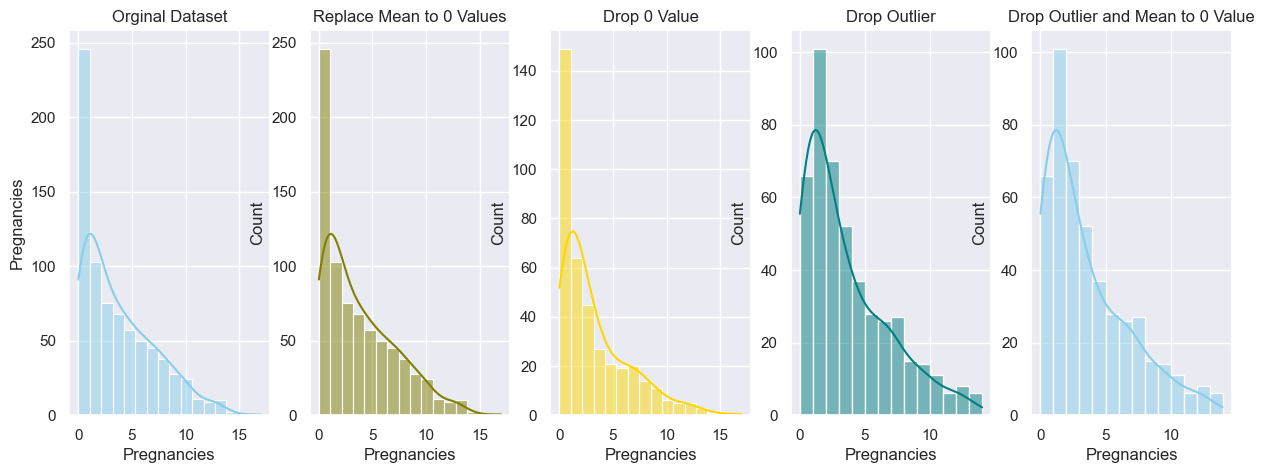

In [9]:
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

sns.histplot(data=df_org, x="Pregnancies", kde=True, color="skyblue", ax=axs[0]).set(title='Orginal Dataset',ylabel='Pregnancies')
sns.histplot(data=df_mean, x="Pregnancies", kde=True, color="olive", ax=axs[1]).set_title('Replace Mean to 0 Values')
sns.histplot(data=df_drop, x="Pregnancies", kde=True, color="gold", ax=axs[2]).set_title('Drop 0 Value')
sns.histplot(data=df_out_drop, x="Pregnancies", kde=True, color="teal", ax=axs[3]).set_title('Drop Outlier')
sns.histplot(data=df_out_drop_mean, x="Pregnancies", kde=True, color="skyblue", ax=axs[4]).set_title('Drop Outlier and Mean to 0 Value')
plt.show()

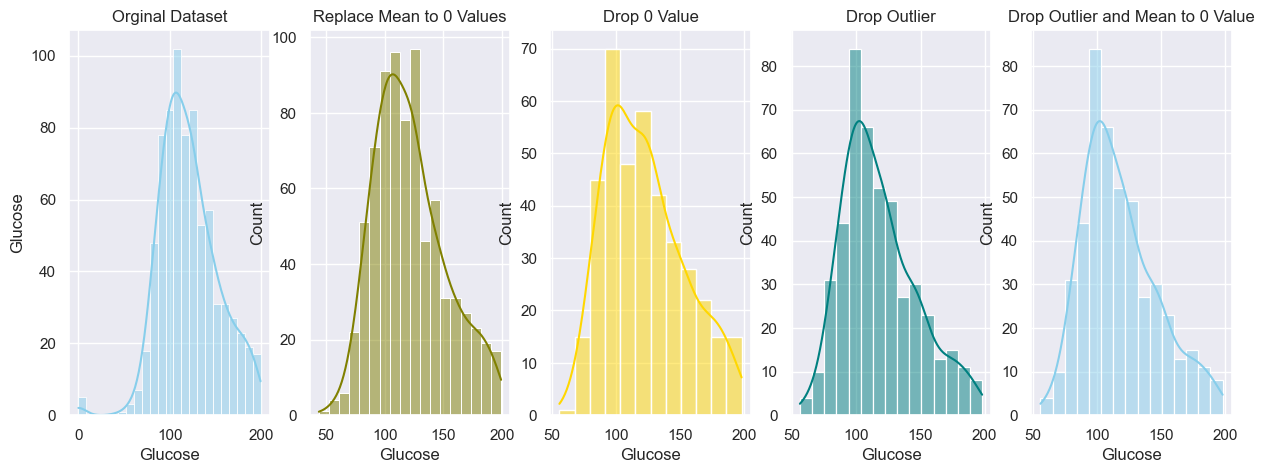

In [10]:
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

sns.histplot(data=df_org, x="Glucose", kde=True, color="skyblue", ax=axs[0]).set(title='Orginal Dataset',ylabel='Glucose')
sns.histplot(data=df_mean, x="Glucose", kde=True, color="olive", ax=axs[1]).set_title('Replace Mean to 0 Values')
sns.histplot(data=df_drop, x="Glucose", kde=True, color="gold", ax=axs[2]).set_title('Drop 0 Value')
sns.histplot(data=df_out_drop, x="Glucose", kde=True, color="teal", ax=axs[3]).set_title('Drop Outlier')
sns.histplot(data=df_out_drop_mean, x="Glucose", kde=True, color="skyblue", ax=axs[4]).set_title('Drop Outlier and Mean to 0 Value')
plt.show()

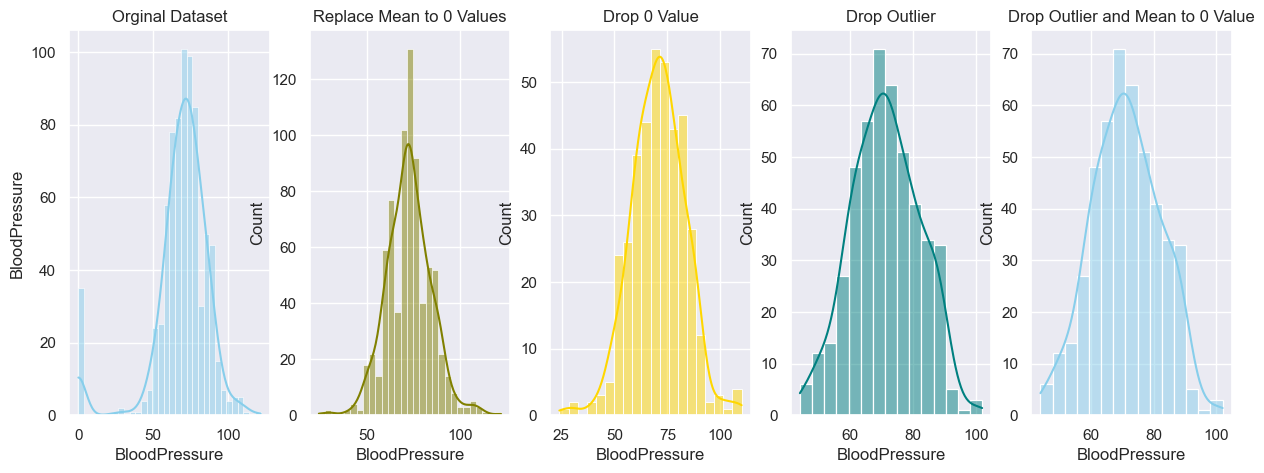

In [11]:
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

sns.histplot(data=df_org, x="BloodPressure", kde=True, color="skyblue", ax=axs[0]).set(title='Orginal Dataset',ylabel='BloodPressure')
sns.histplot(data=df_mean, x="BloodPressure", kde=True, color="olive", ax=axs[1]).set_title('Replace Mean to 0 Values')
sns.histplot(data=df_drop, x="BloodPressure", kde=True, color="gold", ax=axs[2]).set_title('Drop 0 Value')
sns.histplot(data=df_out_drop, x="BloodPressure", kde=True, color="teal", ax=axs[3]).set_title('Drop Outlier')
sns.histplot(data=df_out_drop_mean, x="BloodPressure", kde=True, color="skyblue", ax=axs[4]).set_title('Drop Outlier and Mean to 0 Value')
plt.show()

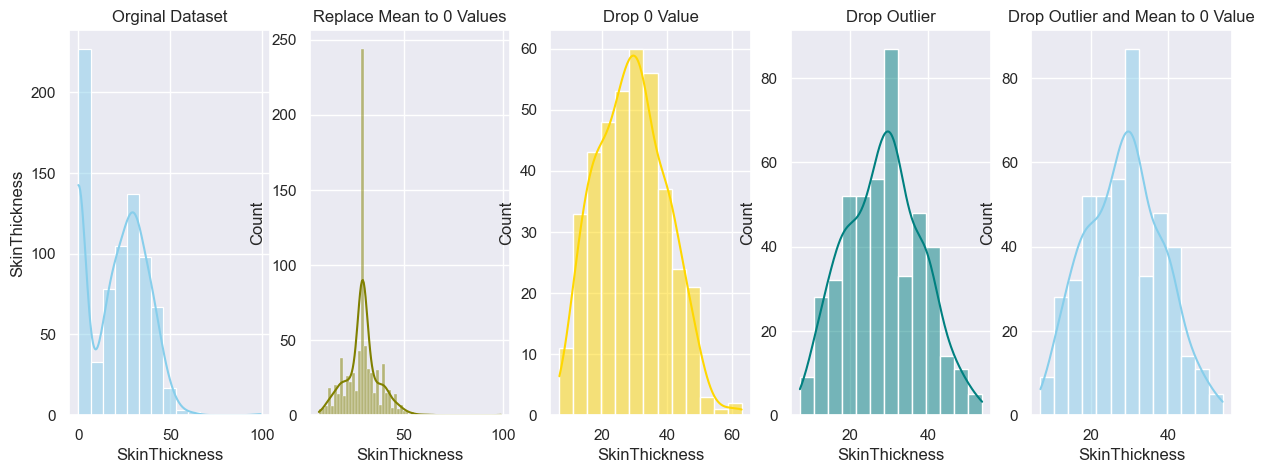

In [12]:
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

sns.histplot(data=df_org, x="SkinThickness", kde=True, color="skyblue", ax=axs[0]).set(title='Orginal Dataset',ylabel='SkinThickness')
sns.histplot(data=df_mean, x="SkinThickness", kde=True, color="olive", ax=axs[1]).set_title('Replace Mean to 0 Values')
sns.histplot(data=df_drop, x="SkinThickness", kde=True, color="gold", ax=axs[2]).set_title('Drop 0 Value')
sns.histplot(data=df_out_drop, x="SkinThickness", kde=True, color="teal", ax=axs[3]).set_title('Drop Outlier')
sns.histplot(data=df_out_drop_mean, x="SkinThickness", kde=True, color="skyblue", ax=axs[4]).set_title('Drop Outlier and Mean to 0 Value')
plt.show()

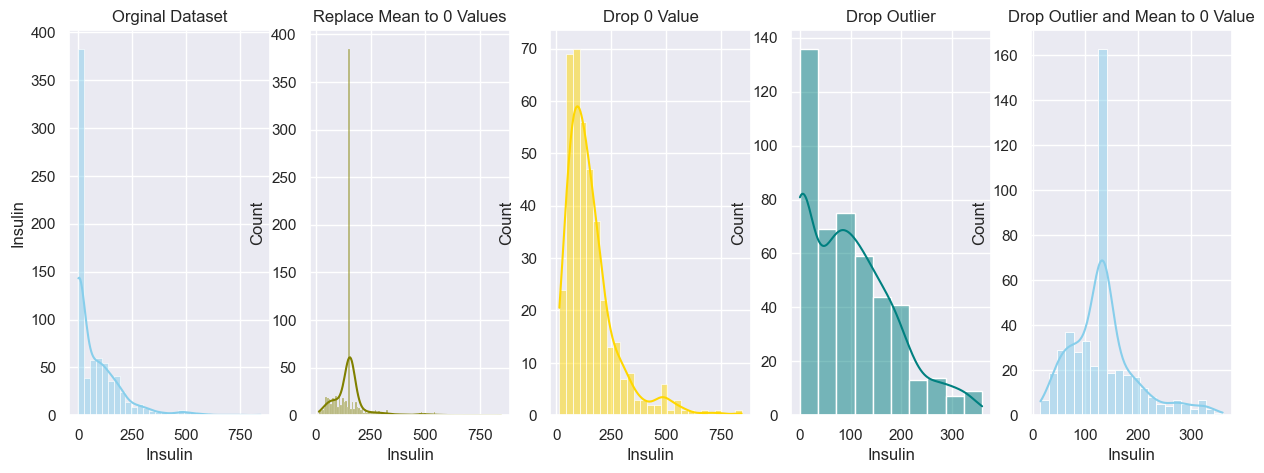

In [13]:
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

sns.histplot(data=df_org, x="Insulin", kde=True, color="skyblue", ax=axs[0]).set(title='Orginal Dataset',ylabel='Insulin')
sns.histplot(data=df_mean, x="Insulin", kde=True, color="olive", ax=axs[1]).set_title('Replace Mean to 0 Values')
sns.histplot(data=df_drop, x="Insulin", kde=True, color="gold", ax=axs[2]).set_title('Drop 0 Value')
sns.histplot(data=df_out_drop, x="Insulin", kde=True, color="teal", ax=axs[3]).set_title('Drop Outlier')
sns.histplot(data=df_out_drop_mean, x="Insulin", kde=True, color="skyblue", ax=axs[4]).set_title('Drop Outlier and Mean to 0 Value')
plt.show()

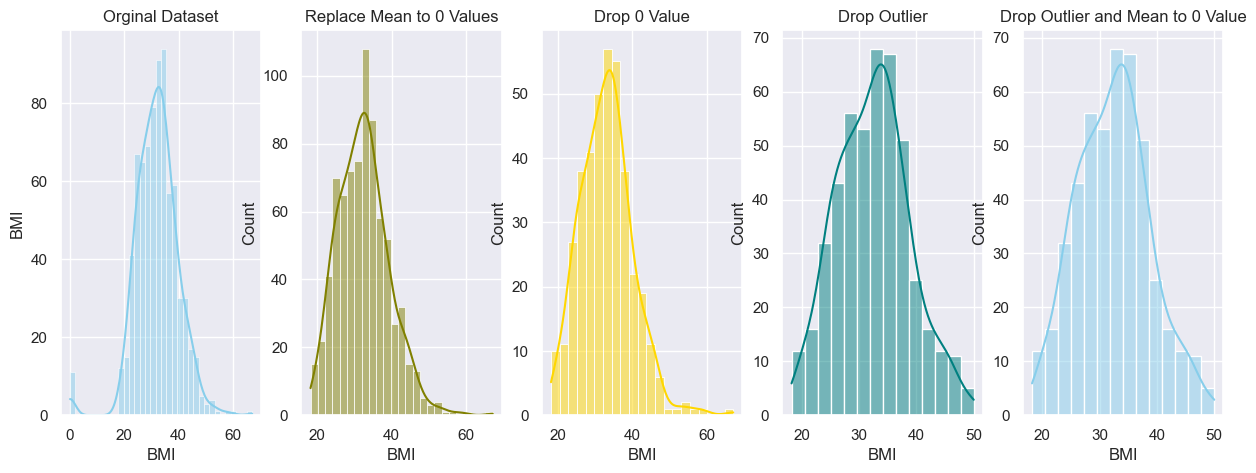

In [14]:
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

sns.histplot(data=df_org, x="BMI", kde=True, color="skyblue", ax=axs[0]).set(title='Orginal Dataset',ylabel='BMI')
sns.histplot(data=df_mean, x="BMI", kde=True, color="olive", ax=axs[1]).set_title('Replace Mean to 0 Values')
sns.histplot(data=df_drop, x="BMI", kde=True, color="gold", ax=axs[2]).set_title('Drop 0 Value')
sns.histplot(data=df_out_drop, x="BMI", kde=True, color="teal", ax=axs[3]).set_title('Drop Outlier')
sns.histplot(data=df_out_drop_mean, x="BMI", kde=True, color="skyblue", ax=axs[4]).set_title('Drop Outlier and Mean to 0 Value')
plt.show()

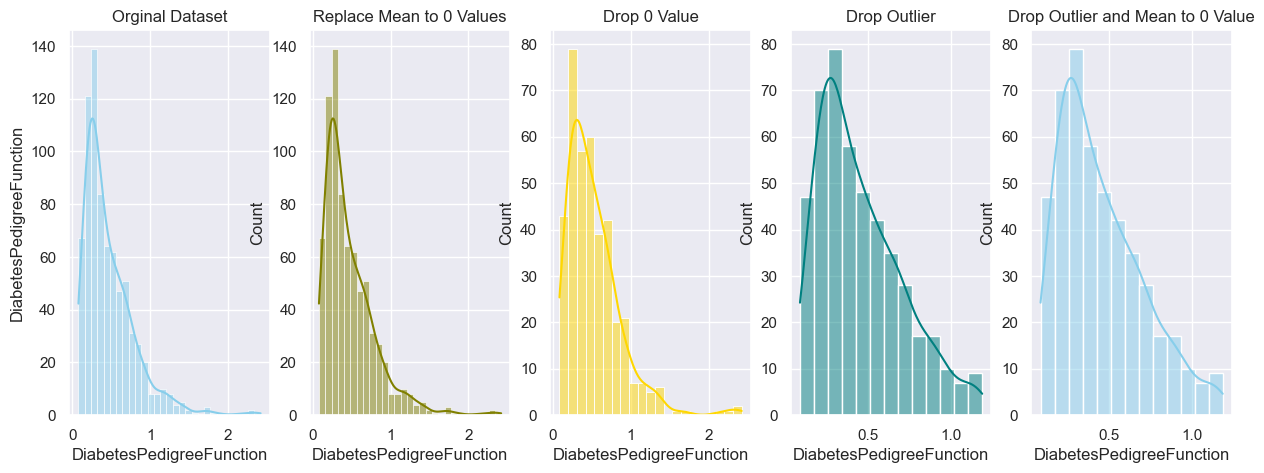

In [15]:
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

sns.histplot(data=df_org, x="DiabetesPedigreeFunction", kde=True, color="skyblue", ax=axs[0]).set(title='Orginal Dataset',ylabel='DiabetesPedigreeFunction')
sns.histplot(data=df_mean, x="DiabetesPedigreeFunction", kde=True, color="olive", ax=axs[1]).set_title('Replace Mean to 0 Values')
sns.histplot(data=df_drop, x="DiabetesPedigreeFunction", kde=True, color="gold", ax=axs[2]).set_title('Drop 0 Value')
sns.histplot(data=df_out_drop, x="DiabetesPedigreeFunction", kde=True, color="teal", ax=axs[3]).set_title('Drop Outlier')
sns.histplot(data=df_out_drop_mean, x="DiabetesPedigreeFunction", kde=True, color="skyblue", ax=axs[4]).set_title('Drop Outlier and Mean to 0 Value')
plt.show()

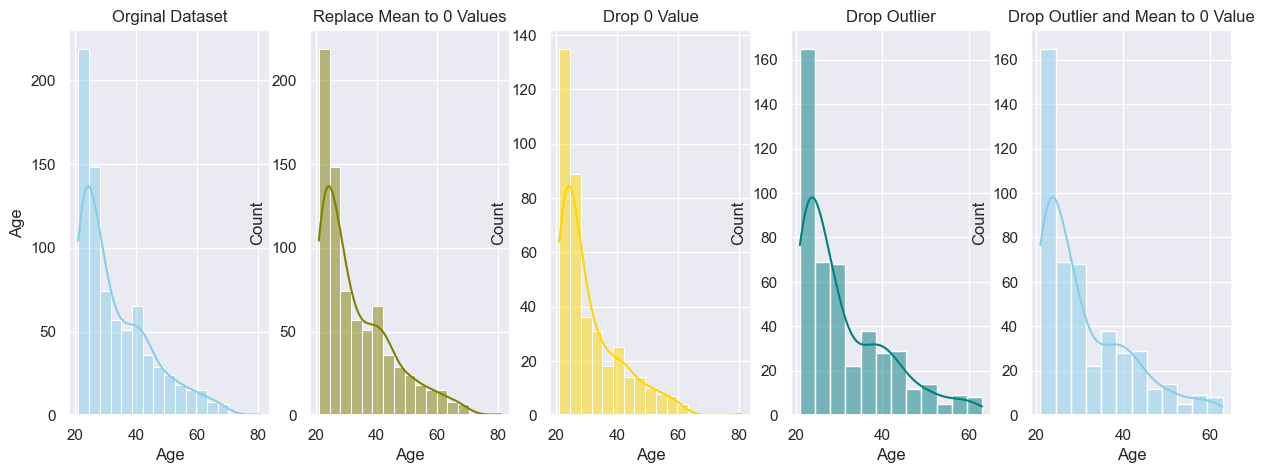

In [16]:
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

sns.histplot(data=df_org, x="Age", kde=True, color="skyblue", ax=axs[0]).set(title='Orginal Dataset',ylabel='Age')
sns.histplot(data=df_mean, x="Age", kde=True, color="olive", ax=axs[1]).set_title('Replace Mean to 0 Values')
sns.histplot(data=df_drop, x="Age", kde=True, color="gold", ax=axs[2]).set_title('Drop 0 Value')
sns.histplot(data=df_out_drop, x="Age", kde=True, color="teal", ax=axs[3]).set_title('Drop Outlier')
sns.histplot(data=df_out_drop_mean, x="Age", kde=True, color="skyblue", ax=axs[4]).set_title('Drop Outlier and Mean to 0 Value')
plt.show()

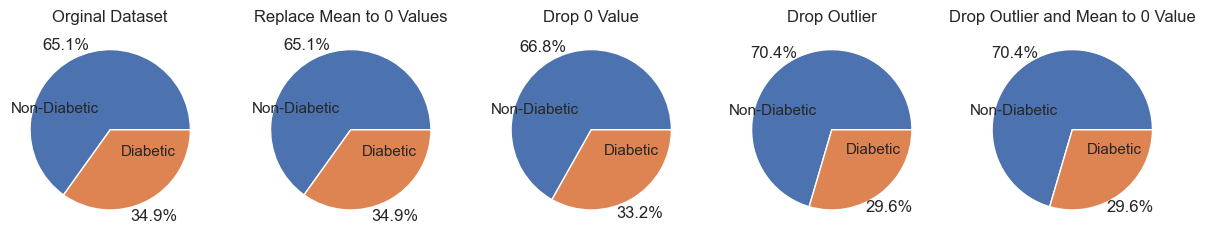

In [17]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

axs[0].pie(df_org['Outcome'].value_counts(),labels=('Non-Diabetic','Diabetic'), autopct='%1.1f%%',
       pctdistance=1.20, labeldistance=.3)
axs[0].set_title("Orginal Dataset")

axs[1].pie(df_mean['Outcome'].value_counts(),labels=('Non-Diabetic','Diabetic'), autopct='%1.1f%%',
       pctdistance=1.20, labeldistance=.3)
axs[1].set_title("Replace Mean to 0 Values")

axs[2].pie(df_drop['Outcome'].value_counts(),labels=('Non-Diabetic','Diabetic'), autopct='%1.1f%%',
       pctdistance=1.20, labeldistance=.3)
axs[2].set_title("Drop 0 Value")

axs[3].pie(df_out_drop['Outcome'].value_counts(),labels=('Non-Diabetic','Diabetic'), autopct='%1.1f%%',
       pctdistance=1.20, labeldistance=.3)
axs[3].set_title("Drop Outlier")

axs[4].pie(df_out_drop_mean['Outcome'].value_counts(),labels=('Non-Diabetic','Diabetic'), autopct='%1.1f%%',
       pctdistance=1.20, labeldistance=.3)
axs[4].set_title("Drop Outlier and Mean to 0 Value")

plt.show()

# Split Data

In [18]:
x_org = df_org.iloc[::,:-1]
y_org = df_org['Outcome']

x_mean = df_mean.iloc[::,:-1]
y_mean = df_mean['Outcome']

x_drop = df_drop.iloc[::,:-1]
y_drop = df_drop['Outcome']

x_out_drop= df_out_drop.iloc[::,:-1]
y_out_drop = df_out_drop['Outcome']

x_out_drop_mean = df_out_drop_mean.iloc[::,:-1]
y_out_drop_mean = df_out_drop_mean['Outcome']

# Split Data Without PreProcessing

In [19]:
x_train_org, x_test_org, y_train_org, y_test_org = train_test_split(x_org, y_org,train_size=.8,stratify=y_org,random_state=2)
x_train_mean, x_test_mean, y_train_mean, y_test_mean = train_test_split(x_mean, y_mean,train_size=.8,stratify=y_mean,random_state=2)
x_train_drop, x_test_drop, y_train_drop, y_test_drop = train_test_split(x_drop, y_drop,train_size=.8,stratify=y_drop,random_state=2)
x_train_out_drop, x_test_out_drop, y_train_out_drop, y_test_out_drop = train_test_split(x_out_drop, y_out_drop,train_size=.8,stratify=y_out_drop,random_state=2)
x_train_out_drop_mean, x_test_out_drop_mean, y_tarin_out_drop_mean, y_test_out_drop_mean = train_test_split(x_out_drop_mean, y_out_drop_mean,train_size=.8,stratify=y_out_drop_mean,random_state=2)

# Balanced Data With Over Sampling

In [20]:
# Random Over Sample
x_org_resampled, y_org_resampled = RandomOverSampler(random_state=2).fit_resample(x_org, y_org)
x_mean_resampled, y_mean_resampled = RandomOverSampler(random_state=2).fit_resample(x_mean, y_mean)
x_drop_resampled, y_drop_resampled = RandomOverSampler(random_state=2).fit_resample(x_drop, y_drop)
x_out_drop_resampled, y_out_drop_resampled = RandomOverSampler(random_state=2).fit_resample(x_out_drop, y_out_drop)
x_out_drop_mean_resampled, y_out_drop_mean_resampled = RandomOverSampler(random_state=2).fit_resample(x_out_drop_mean, y_out_drop_mean)

# SMOTE
x_org_SMOTE, y_org_SMOTE = SMOTE(random_state=2).fit_resample(x_org, y_org)
x_mean_SMOTE, y_mean_SMOTE = SMOTE(random_state=2).fit_resample(x_mean, y_mean)
x_drop_SMOTE, y_drop_SMOTE = SMOTE(random_state=2).fit_resample(x_drop, y_drop)
x_out_drop_SMOTE, y_out_drop_SMOTE = SMOTE(random_state=2).fit_resample(x_out_drop, y_out_drop)
x_out_drop_mean_SMOTE, y_out_drop_mean_SMOTE = SMOTE(random_state=2).fit_resample(x_out_drop_mean, y_out_drop_mean)

# ADASYN
x_org_ADASYN, y_org_ADASYN = ADASYN(random_state=2).fit_resample(x_org, y_org)
x_mean_ADASYN, y_mean_ADASYN = ADASYN(random_state=2).fit_resample(x_mean, y_mean)
x_drop_ADASYN, y_drop_ADASYN = ADASYN(random_state=2).fit_resample(x_drop, y_drop)
x_out_drop_ADASYN, y_out_drop_ADASYN = ADASYN(random_state=2).fit_resample(x_out_drop, y_out_drop)
x_out_drop_mean_ADASYN, y_out_drop_mean_ADASYN = ADASYN(random_state=2).fit_resample(x_out_drop_mean, y_out_drop_mean)

# PreProcessing

In [21]:
# Standard Scaler
x_org_std = StandardScaler().fit_transform(x_org)
x_mean_std = StandardScaler().fit_transform(x_mean)
x_drop_std = StandardScaler().fit_transform(x_drop)
x_out_drop_std = StandardScaler().fit_transform(x_out_drop)
x_out_drop_mean_std = StandardScaler().fit_transform(x_out_drop_mean)

# MinMaxScaler

x_org_minmax = MinMaxScaler().fit_transform(x_org)
x_mean_minmax = MinMaxScaler().fit_transform(x_mean)
x_drop_minmax = MinMaxScaler().fit_transform(x_drop)
x_out_drop_minmax = MinMaxScaler().fit_transform(x_out_drop)
x_out_drop_mean_minmax = MinMaxScaler().fit_transform(x_out_drop_mean)

# Normalizer

x_org_norm = Normalizer().fit_transform(x_org)
x_mean_norm = Normalizer().fit_transform(x_mean)
x_drop_norm = Normalizer().fit_transform(x_drop)
x_out_drop_norm = Normalizer().fit_transform(x_out_drop)
x_out_drop_mean_norm = Normalizer().fit_transform(x_out_drop_mean)

# RobustScaler

x_org_robust = RobustScaler().fit_transform(x_org)
x_mean_robust = RobustScaler().fit_transform(x_mean)
x_drop_robust = RobustScaler().fit_transform(x_drop)
x_out_drop_robust = RobustScaler().fit_transform(x_out_drop)
x_out_drop_mean_robust = RobustScaler().fit_transform(x_out_drop_mean)



# ************ Training ************

In [22]:
X = [x_org,x_mean,x_drop,x_out_drop,x_out_drop_mean]
X_label = ['Original','Mean','Drop Zero','Outlier Drop','Outlier Drop And Mean']

Y = [y_org,y_mean,y_drop,y_out_drop,y_out_drop_mean]

Balanced = [RandomOverSampler,SMOTE,ADASYN]
Balanced_label = ['RandomOverSampler','SMOTE','ADASYN']

PreProcessing = [StandardScaler,RobustScaler,Normalizer,MinMaxScaler]
PreProcessing_label = ['StandardScaler','RobustScaler','Normalizer','MinMaxScaler']

# Perceptron

In [23]:
ppn = Perceptron(random_state=2)

Perceptron_report = {
   'Dataset': [],
   'Balanced': [],
   'PreProcessing': [],
   'Time Fit': [],
   'Train Score': [],
   'Test Score': [],
   'Precision Score': [],
   'Recall Score': [],
   'F1 Score': []
    }

###### Imbalanced Train  ########

for i in range(len(X)):
        x_train, x_test, y_train, y_test = train_test_split(X[i], Y[i],train_size=.8,stratify=Y[i],random_state=2)
        st = time.time()
        ppn.fit(x_train,y_train)
        en = time.time()
        ppn_pred = ppn.predict(x_test)
        Perceptron_report['Dataset'].append(X_label[i])
        Perceptron_report['Balanced'].append('Imbalanced')
        Perceptron_report['PreProcessing'].append('Without')
        Perceptron_report['Time Fit'].append(en-st)
        Perceptron_report['Train Score'].append(ppn.score(x_train,y_train))
        Perceptron_report['Test Score'].append(ppn.score(x_test,y_test))
        Perceptron_report['Precision Score'].append(precision_score(y_test,ppn_pred))
        Perceptron_report['Recall Score'].append(recall_score(y_test,ppn_pred))
        Perceptron_report['F1 Score'].append(f1_score(y_test,ppn_pred))


for i in range(len(X)):
        for j in range(len(PreProcessing)):
                X_for = PreProcessing[j]().fit_transform(X[i])
                x_train, x_test, y_train, y_test = train_test_split(X_for, Y[i],train_size=.8,stratify=Y[i],random_state=2)
                st = time.time()
                ppn.fit(x_train,y_train)
                en = time.time()
                ppn_pred = ppn.predict(x_test)
                Perceptron_report['Dataset'].append(X_label[i])
                Perceptron_report['Balanced'].append('Imbalanced')
                Perceptron_report['PreProcessing'].append(PreProcessing_label[j])
                Perceptron_report['Time Fit'].append(en-st)
                Perceptron_report['Train Score'].append(ppn.score(x_train,y_train))
                Perceptron_report['Test Score'].append(ppn.score(x_test,y_test))
                Perceptron_report['Precision Score'].append(precision_score(y_test,ppn_pred))
                Perceptron_report['Recall Score'].append(recall_score(y_test,ppn_pred))
                Perceptron_report['F1 Score'].append(f1_score(y_test,ppn_pred))

###### Balanced Train  ########

for i in range(len(X)):
        for j in range(len(Balanced)):
                X_B, Y_B = Balanced[j](random_state=2).fit_resample(X[i], Y[i])
                x_train, x_test, y_train, y_test = train_test_split(X_B, Y_B,train_size=.8,stratify=Y_B,random_state=2)
                st = time.time()
                ppn.fit(x_train,y_train)
                en = time.time()
                ppn_pred = ppn.predict(x_test)
                Perceptron_report['Dataset'].append(X_label[i])
                Perceptron_report['Balanced'].append(Balanced_label[j])
                Perceptron_report['PreProcessing'].append('Without')
                Perceptron_report['Time Fit'].append(en-st)
                Perceptron_report['Train Score'].append(ppn.score(x_train,y_train))
                Perceptron_report['Test Score'].append(ppn.score(x_test,y_test))
                Perceptron_report['Precision Score'].append(precision_score(y_test,ppn_pred))
                Perceptron_report['Recall Score'].append(recall_score(y_test,ppn_pred))
                Perceptron_report['F1 Score'].append(f1_score(y_test,ppn_pred))


for i in range(len(X)):
        for k in range(len(Balanced)):
                X_B, Y_B = Balanced[k](random_state=2).fit_resample(X[i], Y[i])
                for j in range(len(PreProcessing)):
                        X_prep = PreProcessing[j]().fit_transform(X_B)
                        x_train, x_test, y_train, y_test = train_test_split(X_prep, Y_B,train_size=.8,stratify=Y_B,random_state=2)
                        st = time.time()
                        ppn.fit(x_train,y_train)
                        en = time.time()
                        ppn_pred = ppn.predict(x_test)
                        Perceptron_report['Dataset'].append(X_label[i])
                        Perceptron_report['Balanced'].append(Balanced_label[k])
                        Perceptron_report['PreProcessing'].append(PreProcessing_label[j])
                        Perceptron_report['Time Fit'].append(en-st)
                        Perceptron_report['Train Score'].append(ppn.score(x_train,y_train))
                        Perceptron_report['Test Score'].append(ppn.score(x_test,y_test))
                        Perceptron_report['Precision Score'].append(precision_score(y_test,ppn_pred))
                        Perceptron_report['Recall Score'].append(recall_score(y_test,ppn_pred))
                        Perceptron_report['F1 Score'].append(f1_score(y_test,ppn_pred))

Perceptron_report = pd.DataFrame(Perceptron_report)
Perceptron_report

c:\Users\MeysaM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MeysaM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Dataset,Balanced,PreProcessing,Time Fit,Train Score,Test Score,Precision Score,Recall Score,F1 Score
0,Original,Imbalanced,Without,0.006095,0.384365,0.363636,0.351351,0.962963,0.514851
1,Mean,Imbalanced,Without,0.004001,0.584691,0.571429,0.442308,0.851852,0.582278
2,Drop Zero,Imbalanced,Without,0.004181,0.565495,0.518987,0.396552,0.884615,0.547619
3,Outlier Drop,Imbalanced,Without,0.004462,0.707775,0.702128,0.000000,0.000000,0.000000
4,Outlier Drop And Mean,Imbalanced,Without,0.003993,0.737265,0.680851,0.375000,0.107143,0.166667
...,...,...,...,...,...,...,...,...,...
95,Outlier Drop And Mean,SMOTE,MinMaxScaler,0.002000,0.678707,0.651515,0.812500,0.393939,0.530612
96,Outlier Drop And Mean,ADASYN,StandardScaler,0.002132,0.634191,0.605839,0.579439,0.873239,0.696629
97,Outlier Drop And Mean,ADASYN,RobustScaler,0.003204,0.726103,0.664234,0.671233,0.690141,0.680556
98,Outlier Drop And Mean,ADASYN,Normalizer,0.001999,0.547794,0.525547,0.522727,0.971831,0.679803


In [24]:
ppn_best = Perceptron_report[(Perceptron_report['Recall Score'] > 0.80) & (Perceptron_report['Precision Score'] > 0.70)]
ppn_best

,Dataset,Balanced,PreProcessing,Time Fit,Train Score,Test Score,Precision Score,Recall Score,F1 Score
71,Drop Zero,SMOTE,MinMaxScaler,0.002997,0.792363,0.780952,0.730159,0.884615,0.8


#### *** Best Perceptron Result Drop Zero , SMOTE Balanced , MinMax Scaler Pre Processing ***

# Predict All DataSet

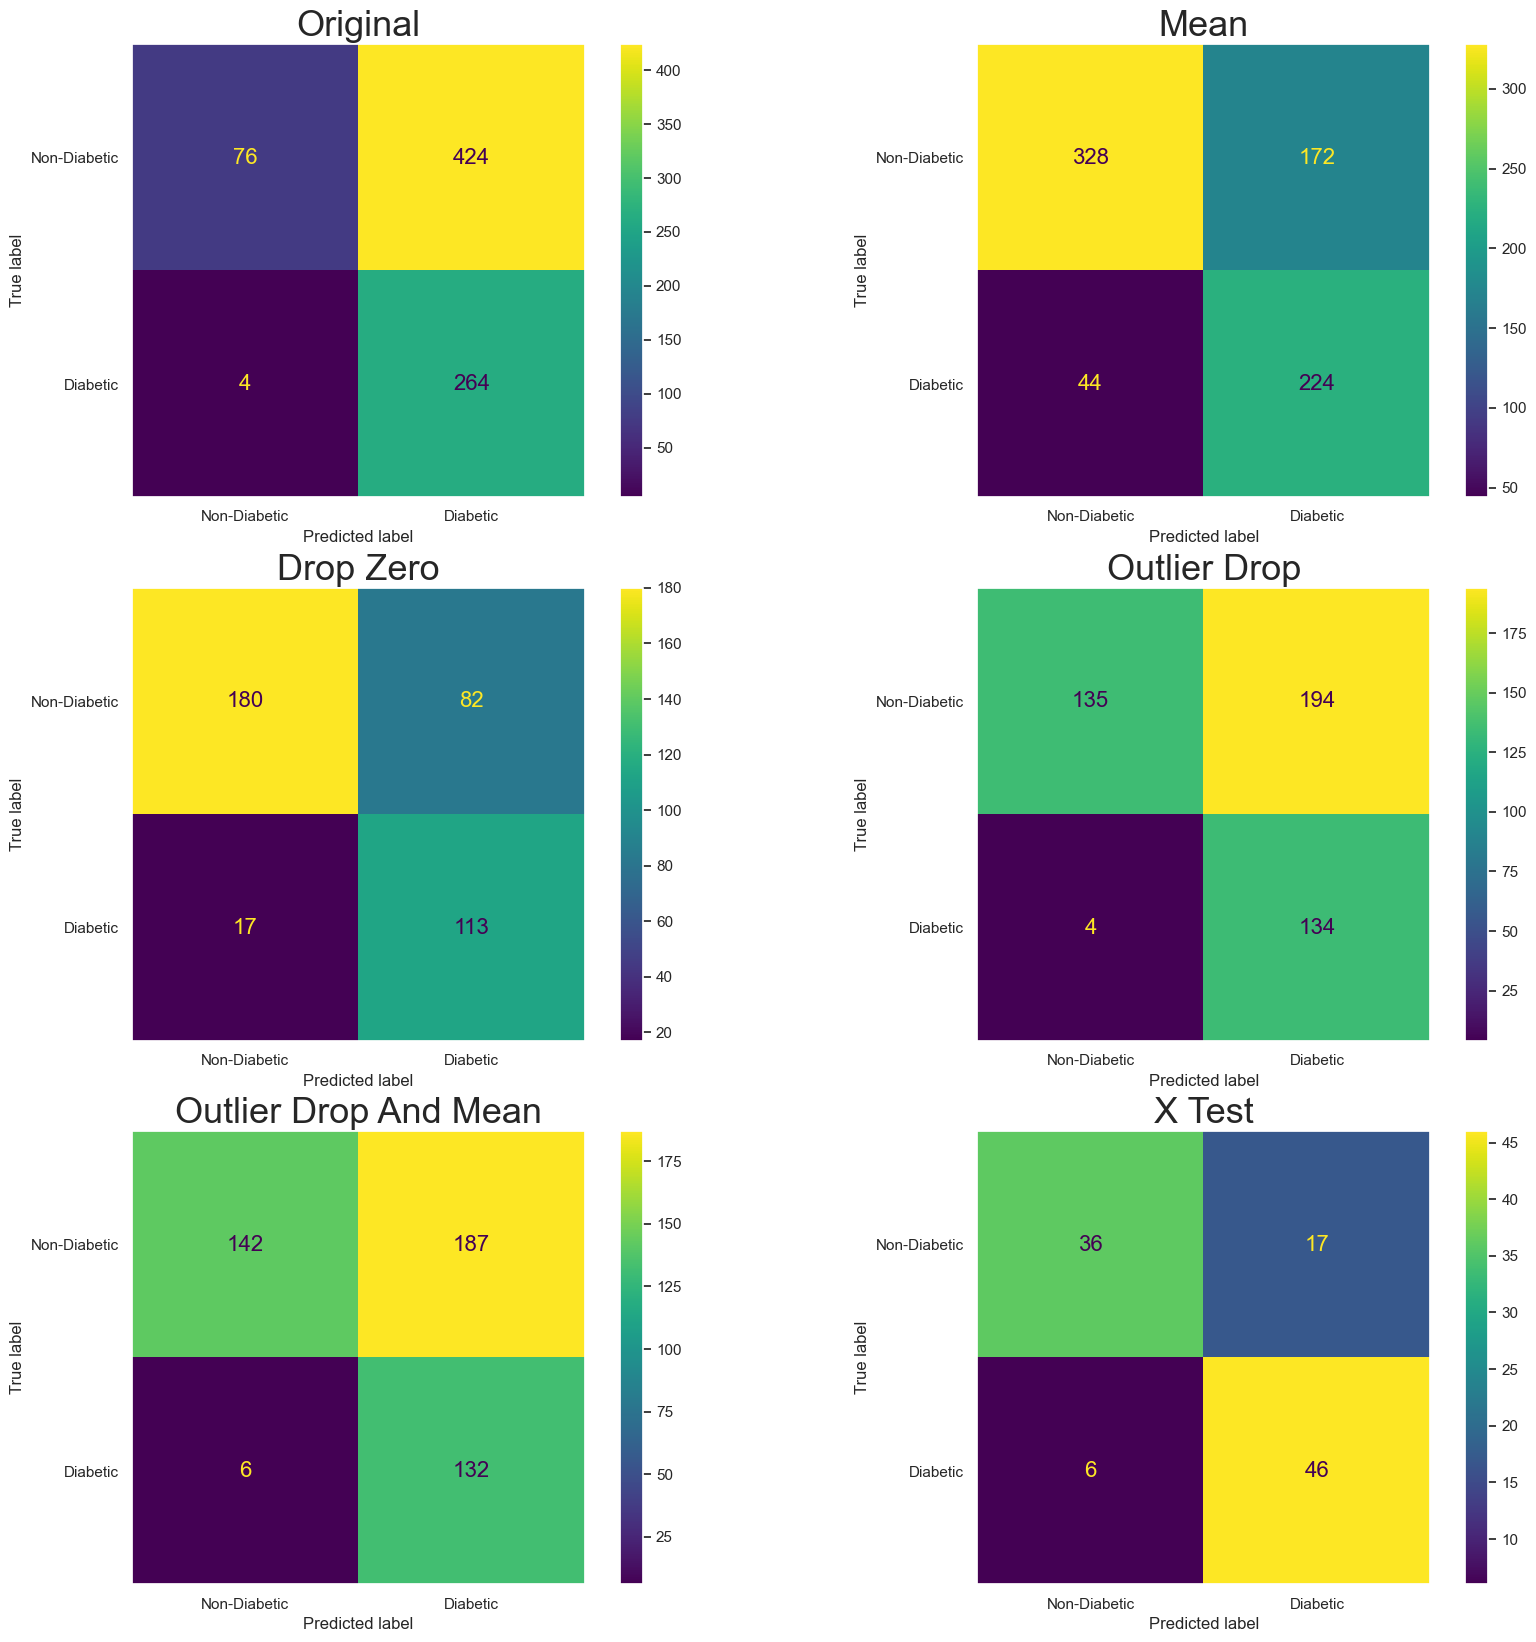

In [25]:
# Balanced SMOTE Drop Zero DataSet
x_drop_SMOTE, y_drop_SMOTE = SMOTE(random_state=2).fit_resample(x_drop, y_drop)

# MinMax Scaler PreProcessing Drop Zero DataSet
x_drop_minmax_SMOTE = MinMaxScaler().fit_transform(x_drop_SMOTE)

# MinMax Scaler PreProcessing All DataSet
x_org_minmax = MinMaxScaler().fit_transform(x_org)
x_mean_minmax = MinMaxScaler().fit_transform(x_mean)
x_drop_minmax = MinMaxScaler().fit_transform(x_drop)
x_out_drop_minmax = MinMaxScaler().fit_transform(x_out_drop)
x_out_drop_mean_minmax = MinMaxScaler().fit_transform(x_out_drop_mean)

# Train Drop Zero DataSet and Predict All DataSet
x_train, x_test, y_train, y_test = train_test_split(x_drop_minmax_SMOTE, y_drop_SMOTE,train_size=.8,stratify=y_drop_SMOTE,random_state=2)
ppn.fit(x_train,y_train)

pred_org = ppn.predict(x_org_minmax)
pred_mean = ppn.predict(x_mean_minmax)
pred_drop = ppn.predict(x_drop_minmax)
pred_out_drop = ppn.predict(x_out_drop_minmax)
pred_out_drop_mean = ppn.predict(x_out_drop_mean_minmax)
pred_x_test = ppn.predict(x_test)


pred_org_matrix = confusion_matrix(y_org, pred_org) 
pred_org_display = ConfusionMatrixDisplay(confusion_matrix = pred_org_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

pred_mean_matrix = confusion_matrix(y_mean, pred_mean) 
pred_mean_display = ConfusionMatrixDisplay(confusion_matrix = pred_mean_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

pred_drop_matrix = confusion_matrix(y_drop, pred_drop) 
pred_drop_display = ConfusionMatrixDisplay(confusion_matrix = pred_drop_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

pred_out_drop_matrix = confusion_matrix(y_out_drop, pred_out_drop) 
pred_out_drop_display = ConfusionMatrixDisplay(confusion_matrix = pred_out_drop_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

pred_out_drop_mean_matrix = confusion_matrix(y_out_drop_mean, pred_out_drop_mean) 
pred_out_drop_mean_display = ConfusionMatrixDisplay(confusion_matrix = pred_out_drop_mean_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

pred_x_test_matrix = confusion_matrix(y_test, pred_x_test) 
pred_x_test_display = ConfusionMatrixDisplay(confusion_matrix = pred_x_test_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

title_size = 26
plt.rcParams.update({'font.size':16})
fig, ax = plt.subplots(3, 2,figsize=(20,20))

ax[0, 0].set_title('Original',size=title_size)
ax[0, 0].grid(False)
pred_org_display.plot(ax=ax[0, 0])

ax[0, 1].set_title('Mean',size=title_size)
ax[0, 1].grid(False)
pred_mean_display.plot(ax=ax[0, 1])

ax[1, 0].set_title('Drop Zero',size=title_size)
ax[1, 0].grid(False)
pred_drop_display.plot(ax=ax[1, 0])

ax[1, 1].set_title('Outlier Drop',size=title_size)
ax[1, 1].grid(False)
pred_out_drop_display.plot(ax=ax[1, 1])

ax[2, 0].set_title('Outlier Drop And Mean',size=title_size)
ax[2, 0].grid(False)
pred_out_drop_mean_display.plot(ax=ax[2, 0])

ax[2, 1].set_title('X Test',size=title_size)
ax[2, 1].grid(False)
pred_x_test_display.plot(ax=ax[2, 1])

plt.show()



# Logistic Regression

In [26]:
%%capture

C =  [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

LogisticRegression_report = {
   'Dataset': [],
   'Balanced': [],
   'PreProcessing': [],
   'C': [],
   'Time Fit': [],
   'Train Score': [],
   'Test Score': [],
   'Precision Score': [],
   'Recall Score': [],
   'F1 Score': []
    }

###### Imbalanced Train  ########

for i in range(len(X)):
        x_train, x_test, y_train, y_test = train_test_split(X[i], Y[i],train_size=.8,stratify=Y[i],random_state=2)      
        for j in C:
            lr = LogisticRegression(random_state=2,max_iter=1000,penalty='l2',C=j)
            st = time.time()
            lr.fit(x_train,y_train)
            en = time.time()
            lr_pred = lr.predict(x_test)
            LogisticRegression_report['Dataset'].append(X_label[i])
            LogisticRegression_report['Balanced'].append('Imbalanced')
            LogisticRegression_report['PreProcessing'].append('Without')
            LogisticRegression_report['C'].append(j)
            LogisticRegression_report['Time Fit'].append(en-st)
            LogisticRegression_report['Train Score'].append(lr.score(x_train,y_train))
            LogisticRegression_report['Test Score'].append(lr.score(x_test,y_test))
            LogisticRegression_report['Precision Score'].append(precision_score(y_test,lr_pred))
            LogisticRegression_report['Recall Score'].append(recall_score(y_test,lr_pred))
            LogisticRegression_report['F1 Score'].append(f1_score(y_test,lr_pred))


for i in range(len(X)):
        for j in range(len(PreProcessing)):
                X_for = PreProcessing[j]().fit_transform(X[i])
                x_train, x_test, y_train, y_test = train_test_split(X_for, Y[i],train_size=.8,stratify=Y[i],random_state=2)
                for k in C:
                    lr = LogisticRegression(random_state=2,max_iter=1000,penalty='l2',C=k)
                    st = time.time()
                    lr.fit(x_train,y_train)
                    en = time.time()
                    lr_pred = lr.predict(x_test)
                    LogisticRegression_report['Dataset'].append(X_label[i])
                    LogisticRegression_report['Balanced'].append('Imbalanced')
                    LogisticRegression_report['PreProcessing'].append(PreProcessing_label[j])
                    LogisticRegression_report['C'].append(k)
                    LogisticRegression_report['Time Fit'].append(en-st)
                    LogisticRegression_report['Train Score'].append(lr.score(x_train,y_train))
                    LogisticRegression_report['Test Score'].append(lr.score(x_test,y_test))
                    LogisticRegression_report['Precision Score'].append(precision_score(y_test,lr_pred))
                    LogisticRegression_report['Recall Score'].append(recall_score(y_test,lr_pred))
                    LogisticRegression_report['F1 Score'].append(f1_score(y_test,lr_pred))

# ###### Balanced Train  ########

for i in range(len(X)):
        for j in range(len(Balanced)):
                X_B, Y_B = Balanced[j](random_state=2).fit_resample(X[i], Y[i])
                x_train, x_test, y_train, y_test = train_test_split(X_B, Y_B,train_size=.8,stratify=Y_B,random_state=2)
                for k in C:
                    lr = LogisticRegression(random_state=2,max_iter=1000,penalty='l2',C=k)
                    st = time.time()
                    lr.fit(x_train,y_train)
                    en = time.time()
                    lr_pred = lr.predict(x_test)
                    LogisticRegression_report['Dataset'].append(X_label[i])
                    LogisticRegression_report['Balanced'].append(Balanced_label[j])
                    LogisticRegression_report['PreProcessing'].append('Without')
                    LogisticRegression_report['C'].append(k)
                    LogisticRegression_report['Time Fit'].append(en-st)
                    LogisticRegression_report['Train Score'].append(lr.score(x_train,y_train))
                    LogisticRegression_report['Test Score'].append(lr.score(x_test,y_test))
                    LogisticRegression_report['Precision Score'].append(precision_score(y_test,lr_pred))
                    LogisticRegression_report['Recall Score'].append(recall_score(y_test,lr_pred))
                    LogisticRegression_report['F1 Score'].append(f1_score(y_test,lr_pred))


for i in range(len(X)):
        for k in range(len(Balanced)):
                X_B, Y_B = Balanced[k](random_state=2).fit_resample(X[i], Y[i])
                for j in range(len(PreProcessing)):
                        X_prep = PreProcessing[j]().fit_transform(X_B)
                        x_train, x_test, y_train, y_test = train_test_split(X_prep, Y_B,train_size=.8,stratify=Y_B,random_state=2)
                        for z in C:
                                lr = LogisticRegression(random_state=2,max_iter=1000,penalty='l2',C=z)
                                st = time.time()
                                lr.fit(x_train,y_train)
                                en = time.time()
                                lr_pred = lr.predict(x_test)
                                LogisticRegression_report['Dataset'].append(X_label[i])
                                LogisticRegression_report['Balanced'].append(Balanced_label[k])
                                LogisticRegression_report['PreProcessing'].append(PreProcessing_label[j])
                                LogisticRegression_report['C'].append(z)
                                LogisticRegression_report['Time Fit'].append(en-st)
                                LogisticRegression_report['Train Score'].append(lr.score(x_train,y_train))
                                LogisticRegression_report['Test Score'].append(lr.score(x_test,y_test))
                                LogisticRegression_report['Precision Score'].append(precision_score(y_test,lr_pred))
                                LogisticRegression_report['Recall Score'].append(recall_score(y_test,lr_pred))
                                LogisticRegression_report['F1 Score'].append(f1_score(y_test,lr_pred))

LogisticRegression_report = pd.DataFrame(LogisticRegression_report)

In [27]:
LogisticRegression_report

,Dataset,Balanced,PreProcessing,C,Time Fit,Train Score,Test Score,Precision Score,Recall Score,F1 Score
0,Original,Imbalanced,Without,0.001,0.042279,0.773616,0.753247,0.722222,0.481481,0.577778
1,Original,Imbalanced,Without,0.010,0.042033,0.778502,0.753247,0.722222,0.481481,0.577778
2,Original,Imbalanced,Without,0.100,0.062186,0.781759,0.753247,0.710526,0.500000,0.586957
3,Original,Imbalanced,Without,1.000,0.040947,0.788274,0.759740,0.717949,0.518519,0.602151
4,Original,Imbalanced,Without,10.000,0.055762,0.783388,0.759740,0.717949,0.518519,0.602151
...,...,...,...,...,...,...,...,...,...,...
595,Outlier Drop And Mean,ADASYN,MinMaxScaler,0.010,0.004006,0.746324,0.700730,0.656250,0.887324,0.754491
596,Outlier Drop And Mean,ADASYN,MinMaxScaler,0.100,0.003000,0.761029,0.715328,0.705128,0.774648,0.738255
597,Outlier Drop And Mean,ADASYN,MinMaxScaler,1.000,0.004003,0.779412,0.708029,0.701299,0.760563,0.729730
598,Outlier Drop And Mean,ADASYN,MinMaxScaler,10.000,0.003995,0.770221,0.708029,0.696203,0.774648,0.733333


In [28]:
LogisticRegression_report[(LogisticRegression_report['Recall Score'] > 0.80) & (LogisticRegression_report['Precision Score'] > 0.70)]

,Dataset,Balanced,PreProcessing,C,Time Fit,Train Score,Test Score,Precision Score,Recall Score,F1 Score
507,Outlier Drop,ADASYN,StandardScaler,1.00,0.003999,0.774725,0.722628,0.703704,0.802817,0.75
511,Outlier Drop,ADASYN,RobustScaler,0.01,0.003550,0.769231,0.722628,0.703704,0.802817,0.75
513,Outlier Drop,ADASYN,RobustScaler,1.00,0.004000,0.772894,0.722628,0.703704,0.802817,0.75
526,Outlier Drop,ADASYN,MinMaxScaler,10.00,0.005004,0.772894,0.722628,0.703704,0.802817,0.75


# Predict All DataSet

# Balanced ADASYN Outlier Drop DataSet And MinMax Scaler PreProcessing

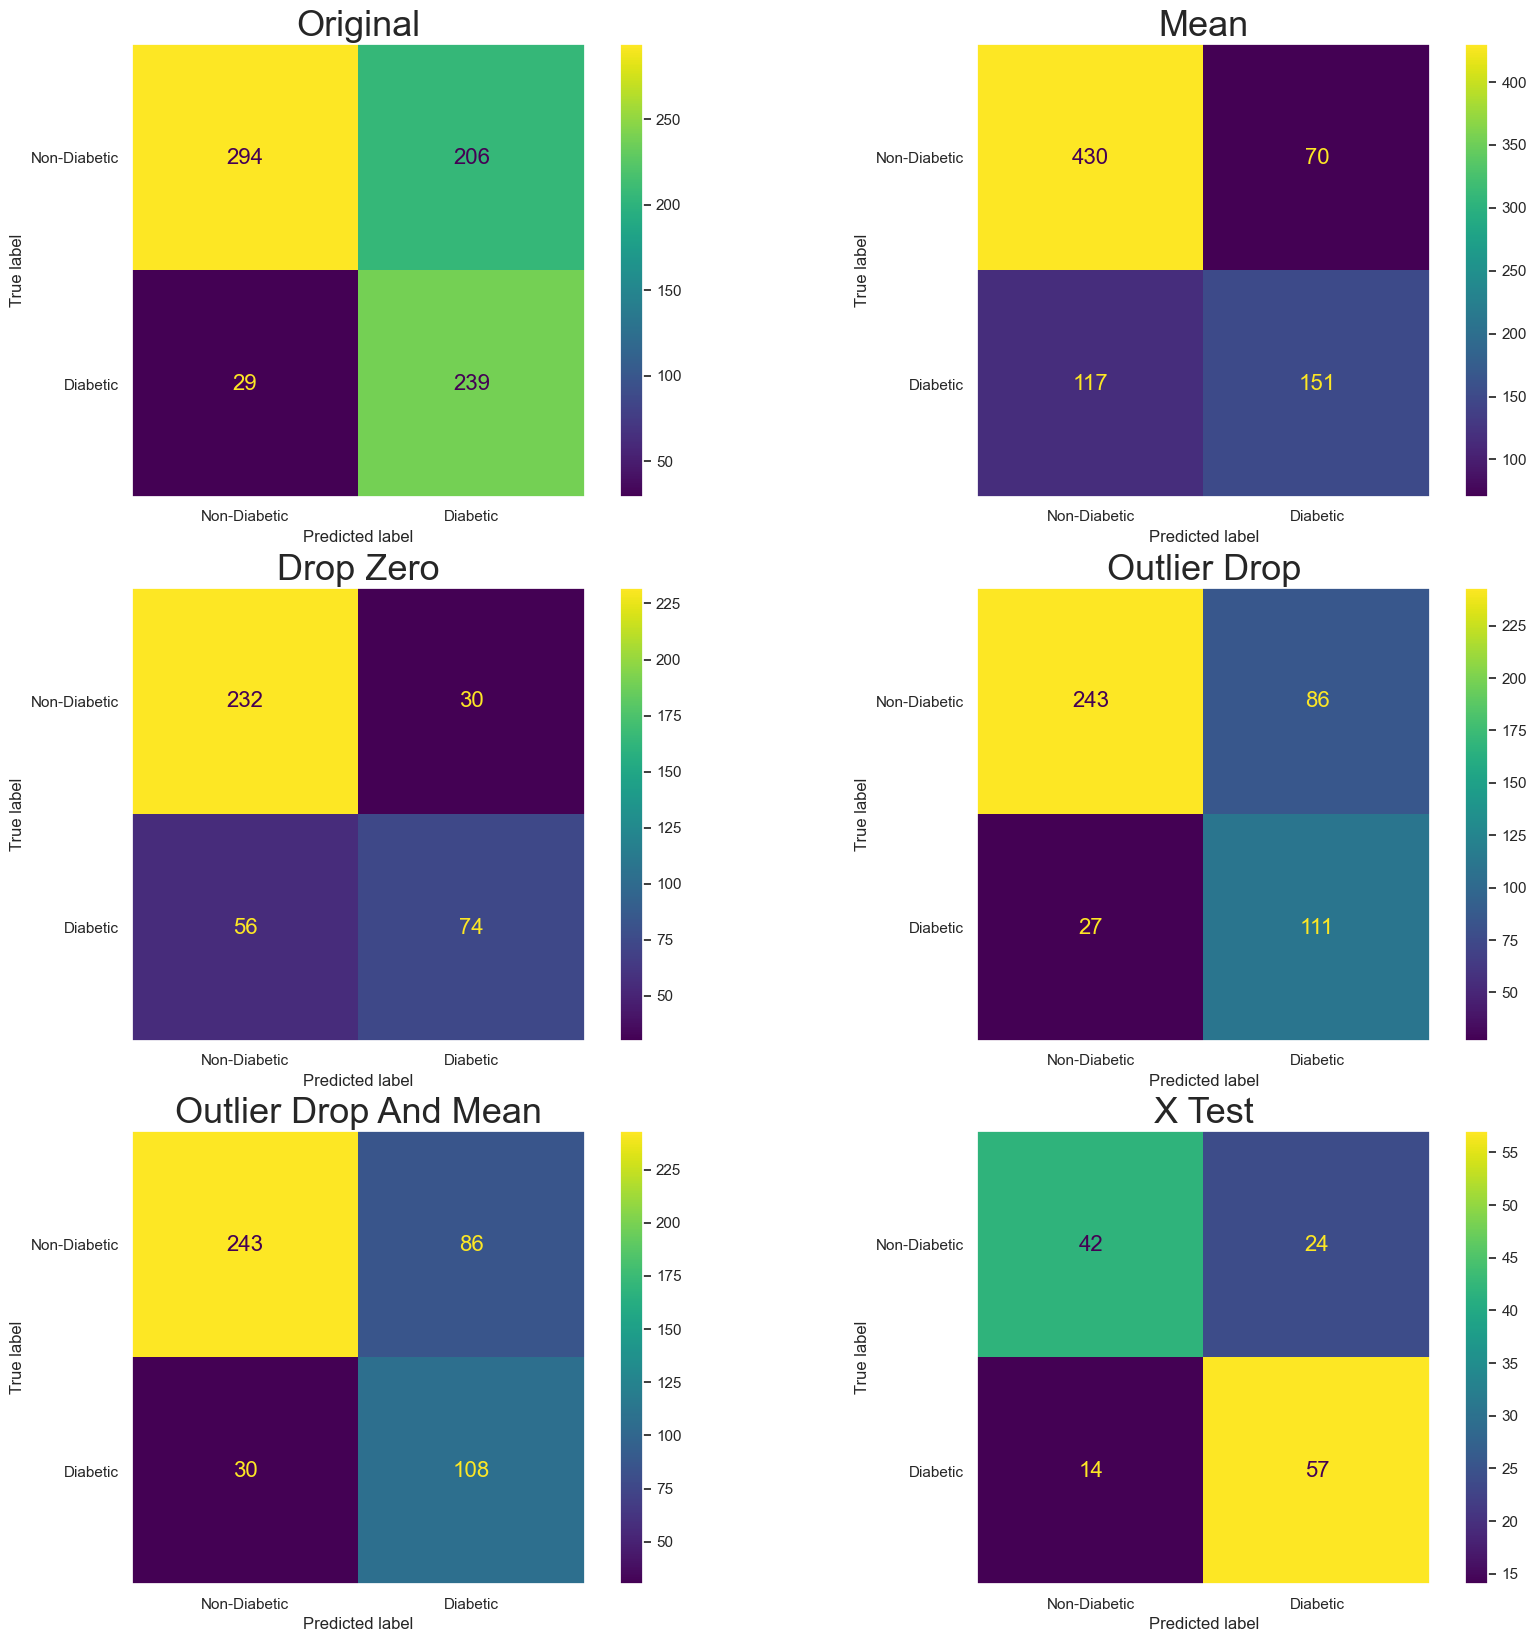

In [29]:
# Balanced ADASYN Outlier Drop DataSet
x_out_drop_ADASYN, y_out_drop_ADASYN = ADASYN(random_state=2).fit_resample(x_out_drop, y_out_drop)

# MinMax Scaler PreProcessing Outlier Drop DataSet
x_out_drop_minmax_ADASYN = MinMaxScaler().fit_transform(x_out_drop_ADASYN)



# MinMax Scaler PreProcessing All DataSet
x_org_minmax = MinMaxScaler().fit_transform(x_org)
x_mean_minmax = MinMaxScaler().fit_transform(x_mean)
x_drop_minmax = MinMaxScaler().fit_transform(x_drop)
x_out_drop_minmax = MinMaxScaler().fit_transform(x_out_drop)
x_out_drop_mean_minmax = MinMaxScaler().fit_transform(x_out_drop_mean)

# Train Drop Zero DataSet and Predict All DataSet
x_train, x_test, y_train, y_test = train_test_split(x_out_drop_minmax_ADASYN, y_out_drop_ADASYN,train_size=.8,stratify=y_out_drop_ADASYN,random_state=2)
lr = LogisticRegression(random_state=2,max_iter=1000,penalty='l2',C=10)
lr.fit(x_train,y_train)

lr_pred_org = lr.predict(x_org_minmax)
lr_pred_mean = lr.predict(x_mean_minmax)
lr_pred_drop = lr.predict(x_drop_minmax)
lr_pred_out_drop = lr.predict(x_out_drop_minmax)
lr_pred_out_drop_mean = lr.predict(x_out_drop_mean_minmax)
lr_pred_x_test = lr.predict(x_test)


pred_org_matrix = confusion_matrix(y_org, lr_pred_org) 
pred_org_display = ConfusionMatrixDisplay(confusion_matrix = pred_org_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

pred_mean_matrix = confusion_matrix(y_mean, lr_pred_mean) 
pred_mean_display = ConfusionMatrixDisplay(confusion_matrix = pred_mean_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

pred_drop_matrix = confusion_matrix(y_drop, lr_pred_drop) 
pred_drop_display = ConfusionMatrixDisplay(confusion_matrix = pred_drop_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

pred_out_drop_matrix = confusion_matrix(y_out_drop, lr_pred_out_drop) 
pred_out_drop_display = ConfusionMatrixDisplay(confusion_matrix = pred_out_drop_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

pred_out_drop_mean_matrix = confusion_matrix(y_out_drop_mean, lr_pred_out_drop_mean) 
pred_out_drop_mean_display = ConfusionMatrixDisplay(confusion_matrix = pred_out_drop_mean_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

pred_x_test_matrix = confusion_matrix(y_test, lr_pred_x_test) 
pred_x_test_display = ConfusionMatrixDisplay(confusion_matrix = pred_x_test_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

title_size = 26
plt.rcParams.update({'font.size':16})
fig, ax = plt.subplots(3, 2,figsize=(20,20))

ax[0, 0].set_title('Original',size=title_size)
ax[0, 0].grid(False)
pred_org_display.plot(ax=ax[0, 0])

ax[0, 1].set_title('Mean',size=title_size)
ax[0, 1].grid(False)
pred_mean_display.plot(ax=ax[0, 1])

ax[1, 0].set_title('Drop Zero',size=title_size)
ax[1, 0].grid(False)
pred_drop_display.plot(ax=ax[1, 0])

ax[1, 1].set_title('Outlier Drop',size=title_size)
ax[1, 1].grid(False)
pred_out_drop_display.plot(ax=ax[1, 1])

ax[2, 0].set_title('Outlier Drop And Mean',size=title_size)
ax[2, 0].grid(False)
pred_out_drop_mean_display.plot(ax=ax[2, 0])

ax[2, 1].set_title('X Test',size=title_size)
ax[2, 1].grid(False)
pred_x_test_display.plot(ax=ax[2, 1])

plt.show()



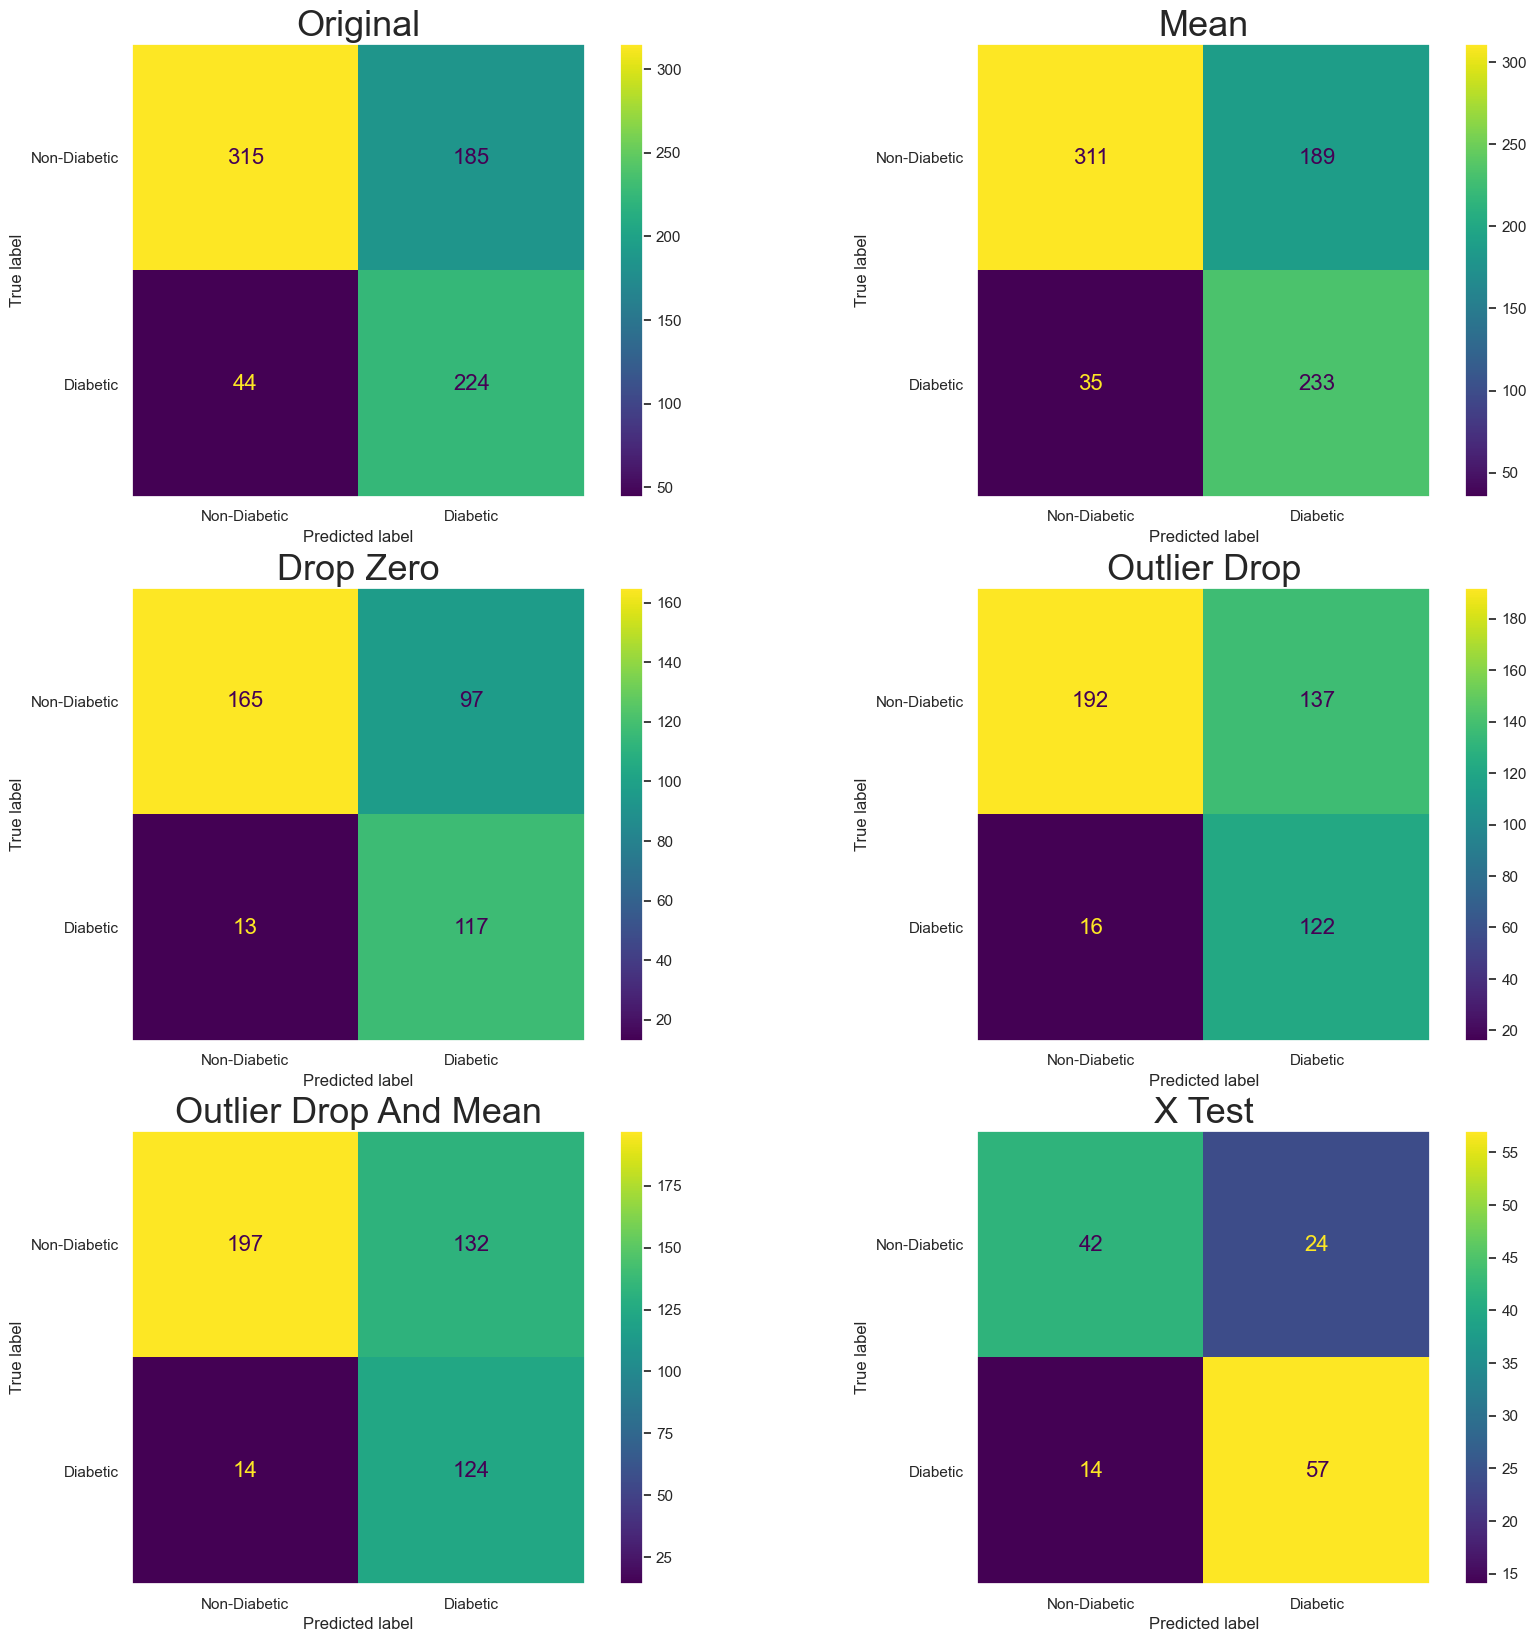

In [30]:
# Balanced ADASYN Outlier Drop DataSet
x_out_drop_ADASYN, y_out_drop_ADASYN = ADASYN(random_state=2).fit_resample(x_out_drop, y_out_drop)

# Robust Scaler PreProcessing Outlier Drop DataSet
x_out_drop_robust_ADASYN = RobustScaler().fit_transform(x_out_drop_ADASYN)

# Robust Scaler PreProcessing All DataSet
x_org_robust = RobustScaler().fit_transform(x_org)
x_mean_robust = RobustScaler().fit_transform(x_mean)
x_drop_robust = RobustScaler().fit_transform(x_drop)
x_out_drop_robust = RobustScaler().fit_transform(x_out_drop)
x_out_drop_mean_robust = RobustScaler().fit_transform(x_out_drop_mean)

# Train Drop Zero DataSet and Predict All DataSet
x_train, x_test, y_train, y_test = train_test_split(x_out_drop_robust_ADASYN, y_out_drop_ADASYN,train_size=.8,stratify=y_out_drop_ADASYN,random_state=2)
lr = LogisticRegression(random_state=2,max_iter=1000,penalty='l2',C=0.01)
lr.fit(x_train,y_train)

lr_pred_org = lr.predict(x_org_robust)
lr_pred_mean = lr.predict(x_mean_robust)
lr_pred_drop = lr.predict(x_drop_robust)
lr_pred_out_drop = lr.predict(x_out_drop_robust)
lr_pred_out_drop_mean = lr.predict(x_out_drop_mean_robust)
lr_pred_x_test = lr.predict(x_test)



pred_org_matrix = confusion_matrix(y_org, lr_pred_org) 
pred_org_display = ConfusionMatrixDisplay(confusion_matrix = pred_org_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

pred_mean_matrix = confusion_matrix(y_mean, lr_pred_mean) 
pred_mean_display = ConfusionMatrixDisplay(confusion_matrix = pred_mean_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

pred_drop_matrix = confusion_matrix(y_drop, lr_pred_drop) 
pred_drop_display = ConfusionMatrixDisplay(confusion_matrix = pred_drop_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

pred_out_drop_matrix = confusion_matrix(y_out_drop, lr_pred_out_drop) 
pred_out_drop_display = ConfusionMatrixDisplay(confusion_matrix = pred_out_drop_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

pred_out_drop_mean_matrix = confusion_matrix(y_out_drop_mean, lr_pred_out_drop_mean) 
pred_out_drop_mean_display = ConfusionMatrixDisplay(confusion_matrix = pred_out_drop_mean_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

pred_x_test_matrix = confusion_matrix(y_test, lr_pred_x_test) 
pred_x_test_display = ConfusionMatrixDisplay(confusion_matrix = pred_x_test_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

title_size = 26
plt.rcParams.update({'font.size':16})
fig, ax = plt.subplots(3, 2,figsize=(20,20))

ax[0, 0].set_title('Original',size=title_size)
ax[0, 0].grid(False)
pred_org_display.plot(ax=ax[0, 0])

ax[0, 1].set_title('Mean',size=title_size)
ax[0, 1].grid(False)
pred_mean_display.plot(ax=ax[0, 1])

ax[1, 0].set_title('Drop Zero',size=title_size)
ax[1, 0].grid(False)
pred_drop_display.plot(ax=ax[1, 0])

ax[1, 1].set_title('Outlier Drop',size=title_size)
ax[1, 1].grid(False)
pred_out_drop_display.plot(ax=ax[1, 1])

ax[2, 0].set_title('Outlier Drop And Mean',size=title_size)
ax[2, 0].grid(False)
pred_out_drop_mean_display.plot(ax=ax[2, 0])

ax[2, 1].set_title('X Test',size=title_size)
ax[2, 1].grid(False)
pred_x_test_display.plot(ax=ax[2, 1])

plt.show()



# Decision Tree

In [31]:
DecisionTree_report = {
   'Dataset': [],
   'Balanced': [],
   'PreProcessing': [],
   'Depth': [],
   'Time Fit': [],
   'Train Score': [],
   'Test Score': [],
   'Precision Score': [],
   'Recall Score': [],
   'F1 Score': []
    }

###### Imbalanced Train  ########

for i in range(len(X)):
        x_train, x_test, y_train, y_test = train_test_split(X[i], Y[i],train_size=.8,stratify=Y[i],random_state=2)
        dt = DecisionTreeClassifier()
        dt.fit(x_train,y_train)
        max_depth = dt.tree_.max_depth
        for j in range(1,max_depth):
            dt = DecisionTreeClassifier(max_depth=j)
            st = time.time()
            dt.fit(x_train,y_train)
            en = time.time()
            dt_pred = dt.predict(x_test)
            DecisionTree_report['Dataset'].append(X_label[i])
            DecisionTree_report['Balanced'].append('Imbalanced')
            DecisionTree_report['PreProcessing'].append('Without')
            DecisionTree_report['Depth'].append(j)
            DecisionTree_report['Time Fit'].append(en-st)
            DecisionTree_report['Train Score'].append(dt.score(x_train,y_train))
            DecisionTree_report['Test Score'].append(dt.score(x_test,y_test))
            DecisionTree_report['Precision Score'].append(precision_score(y_test,dt_pred))
            DecisionTree_report['Recall Score'].append(recall_score(y_test,dt_pred))
            DecisionTree_report['F1 Score'].append(f1_score(y_test,dt_pred))


for i in range(len(X)):
        for j in range(len(PreProcessing)):
                X_for = PreProcessing[j]().fit_transform(X[i])
                x_train, x_test, y_train, y_test = train_test_split(X_for, Y[i],train_size=.8,stratify=Y[i],random_state=2)
                dt = DecisionTreeClassifier()
                dt.fit(x_train,y_train)
                max_depth = dt.tree_.max_depth
                for k in range(1,max_depth):
                    dt = DecisionTreeClassifier(max_depth=k)
                    st = time.time()
                    dt.fit(x_train,y_train)
                    en = time.time()
                    dt_pred = dt.predict(x_test)
                    DecisionTree_report['Dataset'].append(X_label[i])
                    DecisionTree_report['Balanced'].append('Imbalanced')
                    DecisionTree_report['PreProcessing'].append(PreProcessing_label[j])
                    DecisionTree_report['Depth'].append(k)
                    DecisionTree_report['Time Fit'].append(en-st)
                    DecisionTree_report['Train Score'].append(dt.score(x_train,y_train))
                    DecisionTree_report['Test Score'].append(dt.score(x_test,y_test))
                    DecisionTree_report['Precision Score'].append(precision_score(y_test,dt_pred))
                    DecisionTree_report['Recall Score'].append(recall_score(y_test,dt_pred))
                    DecisionTree_report['F1 Score'].append(f1_score(y_test,dt_pred))

# # ###### Balanced Train  ########

for i in range(len(X)):
        for j in range(len(Balanced)):
                X_B, Y_B = Balanced[j](random_state=2).fit_resample(X[i], Y[i])
                x_train, x_test, y_train, y_test = train_test_split(X_B, Y_B,train_size=.8,stratify=Y_B,random_state=2)
                dt = DecisionTreeClassifier()
                dt.fit(x_train,y_train)
                max_depth = dt.tree_.max_depth
                for k in range(1,max_depth):
                    dt = DecisionTreeClassifier(max_depth=k)
                    st = time.time()
                    dt.fit(x_train,y_train)
                    en = time.time()
                    dt_pred = dt.predict(x_test)
                    DecisionTree_report['Dataset'].append(X_label[i])
                    DecisionTree_report['Balanced'].append(Balanced_label[j])
                    DecisionTree_report['PreProcessing'].append('Without')
                    DecisionTree_report['Depth'].append(k)
                    DecisionTree_report['Time Fit'].append(en-st)
                    DecisionTree_report['Train Score'].append(dt.score(x_train,y_train))
                    DecisionTree_report['Test Score'].append(dt.score(x_test,y_test))
                    DecisionTree_report['Precision Score'].append(precision_score(y_test,dt_pred))
                    DecisionTree_report['Recall Score'].append(recall_score(y_test,dt_pred))
                    DecisionTree_report['F1 Score'].append(f1_score(y_test,dt_pred))


for i in range(len(X)):
        for k in range(len(Balanced)):
                X_B, Y_B = Balanced[k](random_state=2).fit_resample(X[i], Y[i])
                for j in range(len(PreProcessing)):
                        X_prep = PreProcessing[j]().fit_transform(X_B)
                        x_train, x_test, y_train, y_test = train_test_split(X_prep, Y_B,train_size=.8,stratify=Y_B,random_state=2)
                        dt = DecisionTreeClassifier()
                        dt.fit(x_train,y_train)
                        max_depth = dt.tree_.max_depth
                        for z in range(1,max_depth):
                                dt = DecisionTreeClassifier(max_depth=z)
                                st = time.time()
                                dt.fit(x_train,y_train)
                                en = time.time()
                                dt_pred = dt.predict(x_test)
                                DecisionTree_report['Dataset'].append(X_label[i])
                                DecisionTree_report['Balanced'].append(Balanced_label[k])
                                DecisionTree_report['PreProcessing'].append(PreProcessing_label[j])
                                DecisionTree_report['Depth'].append(z)
                                DecisionTree_report['Time Fit'].append(en-st)
                                DecisionTree_report['Train Score'].append(dt.score(x_train,y_train))
                                DecisionTree_report['Test Score'].append(dt.score(x_test,y_test))
                                DecisionTree_report['Precision Score'].append(precision_score(y_test,dt_pred))
                                DecisionTree_report['Recall Score'].append(recall_score(y_test,dt_pred))
                                DecisionTree_report['F1 Score'].append(f1_score(y_test,dt_pred))

DecisionTree_report = pd.DataFrame(DecisionTree_report)
DecisionTree_report

c:\Users\MeysaM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MeysaM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MeysaM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

,Dataset,Balanced,PreProcessing,Depth,Time Fit,Train Score,Test Score,Precision Score,Recall Score,F1 Score
0,Original,Imbalanced,Without,1,0.003118,0.752443,0.668831,0.526316,0.555556,0.540541
1,Original,Imbalanced,Without,2,0.004003,0.780130,0.740260,0.694444,0.462963,0.555556
2,Original,Imbalanced,Without,3,0.003997,0.783388,0.740260,0.694444,0.462963,0.555556
3,Original,Imbalanced,Without,4,0.004001,0.798046,0.753247,0.807692,0.388889,0.525000
4,Original,Imbalanced,Without,5,0.004000,0.845277,0.779221,0.777778,0.518519,0.622222
...,...,...,...,...,...,...,...,...,...,...
1313,Outlier Drop And Mean,ADASYN,MinMaxScaler,10,0.005003,0.981618,0.781022,0.766234,0.830986,0.797297
1314,Outlier Drop And Mean,ADASYN,MinMaxScaler,11,0.005000,0.988971,0.737226,0.716049,0.816901,0.763158
1315,Outlier Drop And Mean,ADASYN,MinMaxScaler,12,0.004999,0.992647,0.795620,0.765432,0.873239,0.815789
1316,Outlier Drop And Mean,ADASYN,MinMaxScaler,13,0.004999,0.994485,0.795620,0.779221,0.845070,0.810811


In [32]:
DecisionTree_report[(DecisionTree_report['Recall Score'] > 0.85) & (DecisionTree_report['Precision Score'] > 0.85)]

,Dataset,Balanced,PreProcessing,Depth,Time Fit,Train Score,Test Score,Precision Score,Recall Score,F1 Score
907,Drop Zero,RandomOverSampler,MinMaxScaler,9,0.002999,0.99284,0.87619,0.854545,0.903846,0.878505


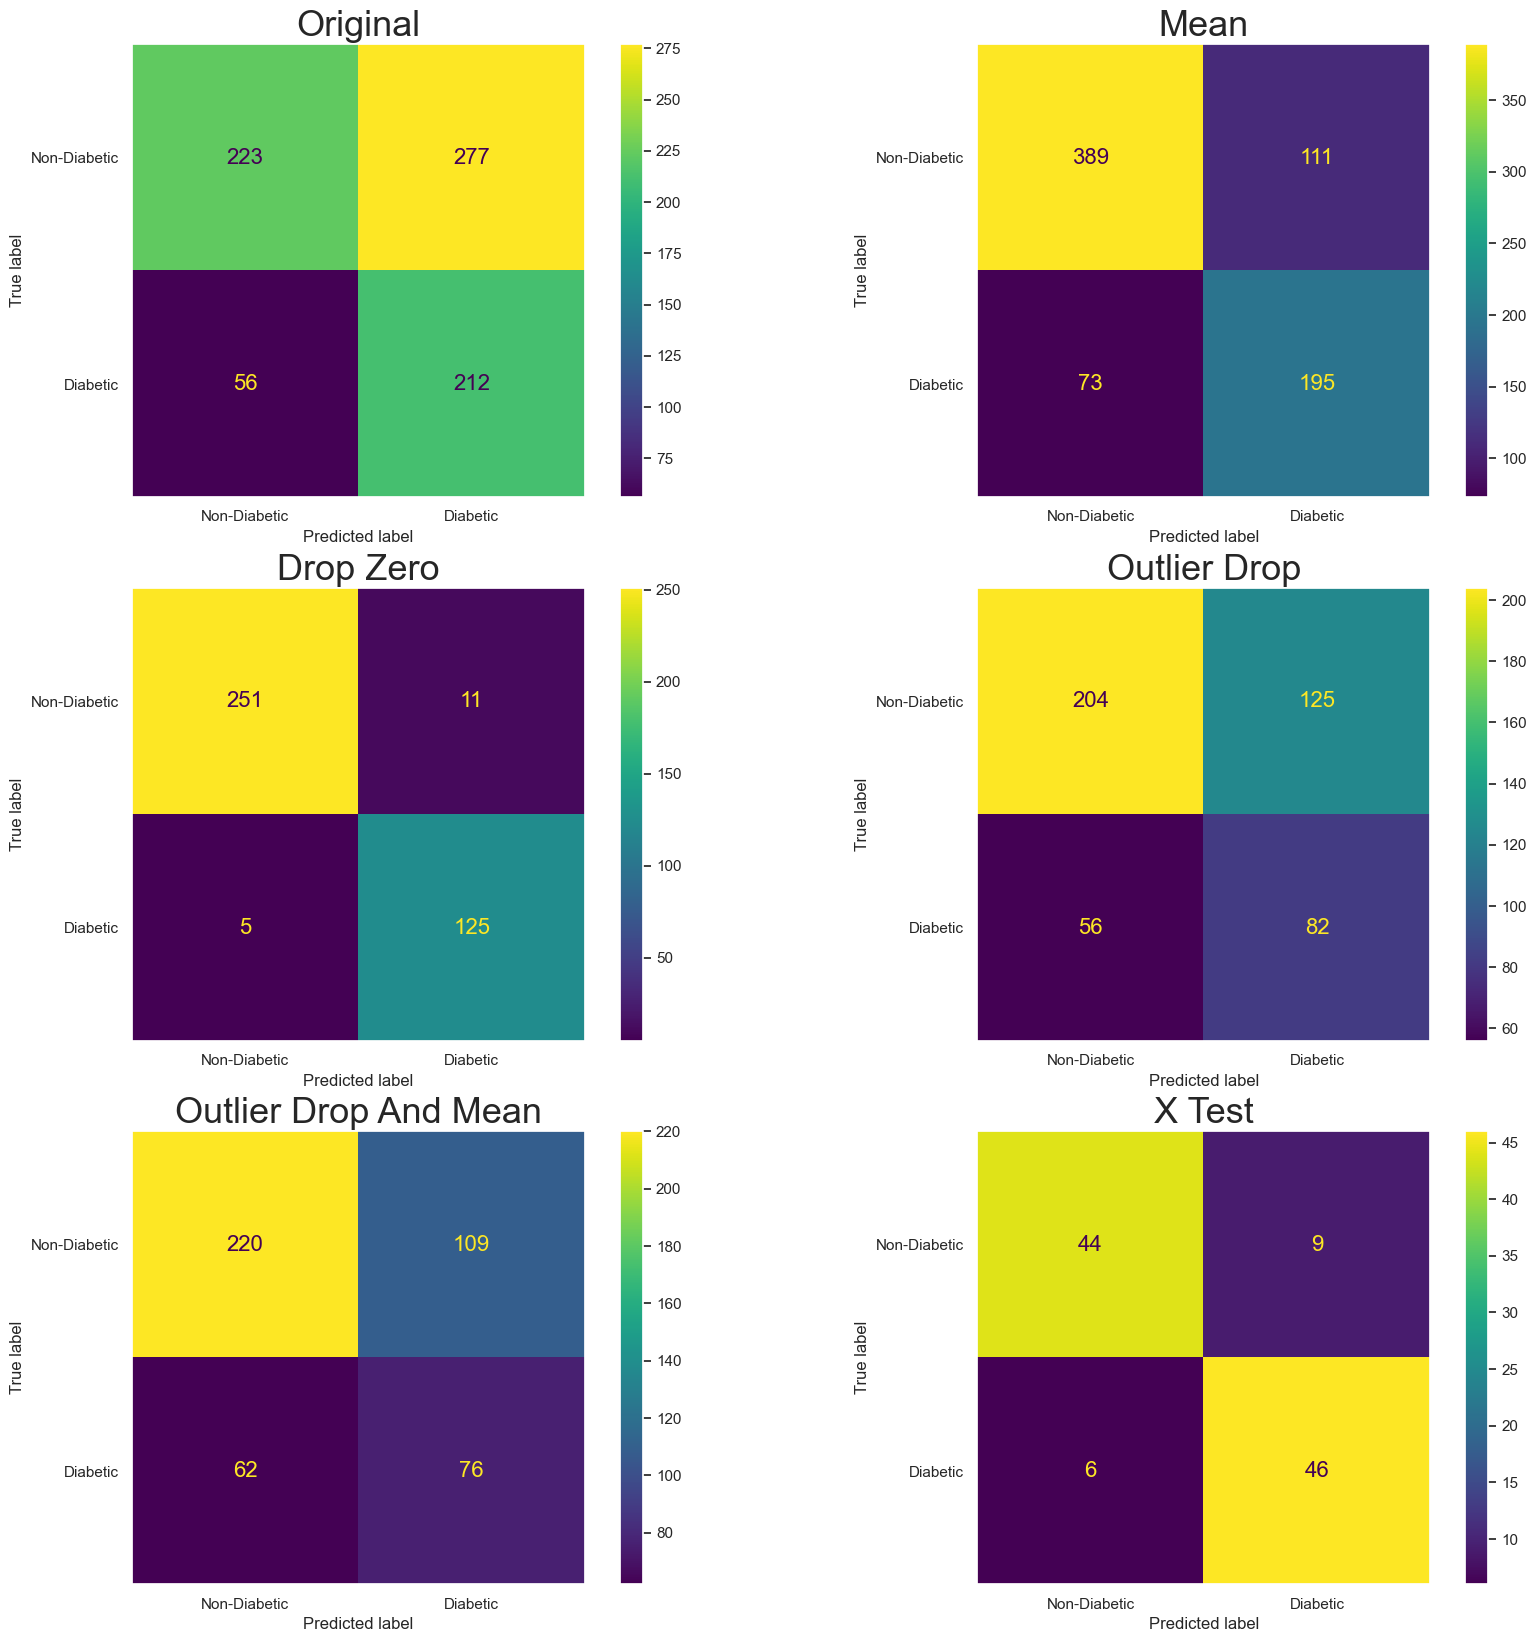

In [33]:
x_drop_RandomOverSampler, y_drop_RandomOverSampler = RandomOverSampler(random_state=2).fit_resample(x_drop, y_drop)
x_drop_RandomOverSampler_minmax = MinMaxScaler().fit_transform(x_drop_RandomOverSampler)


# MinMax Scaler PreProcessing All DataSet
x_org_minmax = MinMaxScaler().fit_transform(x_org)
x_mean_minmax = MinMaxScaler().fit_transform(x_mean)
x_drop_minmax = MinMaxScaler().fit_transform(x_drop)
x_out_drop_minmax = MinMaxScaler().fit_transform(x_out_drop)
x_out_drop_mean_minmax = MinMaxScaler().fit_transform(x_out_drop_mean)


# Train Drop Zero DataSet and Predict All DataSet
x_train, x_test, y_train, y_test = train_test_split(x_drop_RandomOverSampler_minmax, y_drop_RandomOverSampler,train_size=.8,stratify=y_drop_RandomOverSampler,random_state=2)
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(x_train,y_train)

dt_pred_org = dt.predict(x_org_minmax)
dt_pred_mean = dt.predict(x_mean_minmax)
dt_pred_drop = dt.predict(x_drop_minmax)
dt_pred_out_drop = dt.predict(x_out_drop_minmax)
dt_pred_out_drop_mean = dt.predict(x_out_drop_mean_minmax)
dt_pred_x_test = dt.predict(x_test)



pred_org_matrix = confusion_matrix(y_org, dt_pred_org) 
pred_org_display = ConfusionMatrixDisplay(confusion_matrix = pred_org_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

pred_mean_matrix = confusion_matrix(y_mean, dt_pred_mean) 
pred_mean_display = ConfusionMatrixDisplay(confusion_matrix = pred_mean_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

pred_drop_matrix = confusion_matrix(y_drop, dt_pred_drop) 
pred_drop_display = ConfusionMatrixDisplay(confusion_matrix = pred_drop_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

pred_out_drop_matrix = confusion_matrix(y_out_drop, dt_pred_out_drop) 
pred_out_drop_display = ConfusionMatrixDisplay(confusion_matrix = pred_out_drop_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

pred_out_drop_mean_matrix = confusion_matrix(y_out_drop_mean, dt_pred_out_drop_mean) 
pred_out_drop_mean_display = ConfusionMatrixDisplay(confusion_matrix = pred_out_drop_mean_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

pred_x_test_matrix = confusion_matrix(y_test, dt_pred_x_test) 
pred_x_test_display = ConfusionMatrixDisplay(confusion_matrix = pred_x_test_matrix, display_labels = ['Non-Diabetic', 'Diabetic']) 

title_size = 26
plt.rcParams.update({'font.size':16})
fig, ax = plt.subplots(3, 2,figsize=(20,20))

ax[0, 0].set_title('Original',size=title_size)
ax[0, 0].grid(False)
pred_org_display.plot(ax=ax[0, 0])

ax[0, 1].set_title('Mean',size=title_size)
ax[0, 1].grid(False)
pred_mean_display.plot(ax=ax[0, 1])

ax[1, 0].set_title('Drop Zero',size=title_size)
ax[1, 0].grid(False)
pred_drop_display.plot(ax=ax[1, 0])

ax[1, 1].set_title('Outlier Drop',size=title_size)
ax[1, 1].grid(False)
pred_out_drop_display.plot(ax=ax[1, 1])

ax[2, 0].set_title('Outlier Drop And Mean',size=title_size)
ax[2, 0].grid(False)
pred_out_drop_mean_display.plot(ax=ax[2, 0])

ax[2, 1].set_title('X Test',size=title_size)
ax[2, 1].grid(False)
pred_x_test_display.plot(ax=ax[2, 1])

plt.show()

# SVM

In [54]:
%%capture

C =  [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

G = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

SVM_report = {
   'Dataset': [],
   'Balanced': [],
   'PreProcessing': [],
   'C': [],
   'Gamma': [],
   'Time Fit': [],
   'Train Score': [],
   'Test Score': [],
   'Precision Score': [],
   'Recall Score': [],
   'F1 Score': []
    }

###### Imbalanced Train  ########

for i in range(len(X)):
        x_train, x_test, y_train, y_test = train_test_split(X[i], Y[i],train_size=.8,stratify=Y[i],random_state=2)      
        for j in C:
            for g in G:
                svm = SVC(kernel='rbf', random_state=2, gamma = g, C = j)
                st = time.time()
                svm.fit(x_train,y_train)
                en = time.time()
                svm_pred = svm.predict(x_test)
                SVM_report['Dataset'].append(X_label[i])
                SVM_report['Balanced'].append('Imbalanced')
                SVM_report['PreProcessing'].append('Without')
                SVM_report['C'].append(j)
                SVM_report['Gamma'].append(g)
                SVM_report['Time Fit'].append(en-st)
                SVM_report['Train Score'].append(svm.score(x_train,y_train))
                SVM_report['Test Score'].append(svm.score(x_test,y_test))
                SVM_report['Precision Score'].append(precision_score(y_test,svm_pred))
                SVM_report['Recall Score'].append(recall_score(y_test,svm_pred))
                SVM_report['F1 Score'].append(f1_score(y_test,svm_pred))


for i in range(len(X)):
        for j in range(len(PreProcessing)):
                X_for = PreProcessing[j]().fit_transform(X[i])
                x_train, x_test, y_train, y_test = train_test_split(X_for, Y[i],train_size=.8,stratify=Y[i],random_state=2)
                for k in C:
                    for g in G:
                        svm = SVC(kernel='rbf', random_state=2, gamma = g, C = k)
                        st = time.time()
                        svm.fit(x_train,y_train)
                        en = time.time()
                        svm_pred = svm.predict(x_test)
                        SVM_report['Dataset'].append(X_label[i])
                        SVM_report['Balanced'].append('Imbalanced')
                        SVM_report['PreProcessing'].append(PreProcessing_label[j])
                        SVM_report['C'].append(k)
                        SVM_report['Gamma'].append(g)
                        SVM_report['Time Fit'].append(en-st)
                        SVM_report['Train Score'].append(svm.score(x_train,y_train))
                        SVM_report['Test Score'].append(svm.score(x_test,y_test))
                        SVM_report['Precision Score'].append(precision_score(y_test,svm_pred))
                        SVM_report['Recall Score'].append(recall_score(y_test,svm_pred))
                        SVM_report['F1 Score'].append(f1_score(y_test,svm_pred))


# ###### Balanced Train  ########

for i in range(len(X)):
        for j in range(len(Balanced)):
                X_B, Y_B = Balanced[j](random_state=2).fit_resample(X[i], Y[i])
                x_train, x_test, y_train, y_test = train_test_split(X_B, Y_B,train_size=.8,stratify=Y_B,random_state=2)
                for k in C:
                    for g in G:
                        svm = SVC(kernel='rbf', random_state=2, gamma = g, C = k)
                        st = time.time()
                        svm.fit(x_train,y_train)
                        en = time.time()
                        svm_pred = svm.predict(x_test)
                        SVM_report['Dataset'].append(X_label[i])
                        SVM_report['Balanced'].append(Balanced_label[j])
                        SVM_report['PreProcessing'].append('Without')
                        SVM_report['C'].append(k)
                        SVM_report['Gamma'].append(g)
                        SVM_report['Time Fit'].append(en-st)
                        SVM_report['Train Score'].append(svm.score(x_train,y_train))
                        SVM_report['Test Score'].append(svm.score(x_test,y_test))
                        SVM_report['Precision Score'].append(precision_score(y_test,svm_pred))
                        SVM_report['Recall Score'].append(recall_score(y_test,svm_pred))
                        SVM_report['F1 Score'].append(f1_score(y_test,svm_pred))


for i in range(len(X)):
        for k in range(len(Balanced)):
                X_B, Y_B = Balanced[k](random_state=2).fit_resample(X[i], Y[i])
                for j in range(len(PreProcessing)):
                        X_prep = PreProcessing[j]().fit_transform(X_B)
                        x_train, x_test, y_train, y_test = train_test_split(X_prep, Y_B,train_size=.8,stratify=Y_B,random_state=2)
                        for z in C:
                              for g in G:
                                    svm = SVC(kernel='rbf', random_state=2, gamma = g, C = z)
                                    st = time.time()
                                    svm.fit(x_train,y_train)
                                    en = time.time()
                                    svm_pred = svm.predict(x_test)
                                    SVM_report['Dataset'].append(X_label[i])
                                    SVM_report['Balanced'].append(Balanced_label[k])
                                    SVM_report['PreProcessing'].append(PreProcessing_label[j])
                                    SVM_report['C'].append(z)
                                    SVM_report['Gamma'].append(g)
                                    SVM_report['Time Fit'].append(en-st)
                                    SVM_report['Train Score'].append(svm.score(x_train,y_train))
                                    SVM_report['Test Score'].append(svm.score(x_test,y_test))
                                    SVM_report['Precision Score'].append(precision_score(y_test,svm_pred))
                                    SVM_report['Recall Score'].append(recall_score(y_test,svm_pred))
                                    SVM_report['F1 Score'].append(f1_score(y_test,svm_pred))

SVM_report = pd.DataFrame(SVM_report)


In [55]:
SVM_report

,Dataset,Balanced,PreProcessing,C,Gamma,Time Fit,Train Score,Test Score,Precision Score,Recall Score,F1 Score
0,Original,Imbalanced,Without,0.001,0.001,0.018306,0.651466,0.649351,0.000000,0.000000,0.000000
1,Original,Imbalanced,Without,0.001,0.010,0.019099,0.651466,0.649351,0.000000,0.000000,0.000000
2,Original,Imbalanced,Without,0.001,0.100,0.027559,0.651466,0.649351,0.000000,0.000000,0.000000
3,Original,Imbalanced,Without,0.001,1.000,0.035953,0.651466,0.649351,0.000000,0.000000,0.000000
4,Original,Imbalanced,Without,0.001,10.000,0.034005,0.651466,0.649351,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3595,Outlier Drop And Mean,ADASYN,MinMaxScaler,100.000,0.010,0.017067,0.773897,0.715328,0.695122,0.802817,0.745098
3596,Outlier Drop And Mean,ADASYN,MinMaxScaler,100.000,0.100,0.018902,0.816176,0.773723,0.738095,0.873239,0.800000
3597,Outlier Drop And Mean,ADASYN,MinMaxScaler,100.000,1.000,0.035792,0.926471,0.788321,0.744186,0.901408,0.815287
3598,Outlier Drop And Mean,ADASYN,MinMaxScaler,100.000,10.000,0.025690,1.000000,0.788321,0.756098,0.873239,0.810458


In [56]:
SVM_report[(SVM_report['Recall Score'] > 0.80) & (SVM_report['Precision Score'] > 0.80) & (SVM_report['Train Score'] < 0.98)]

,Dataset,Balanced,PreProcessing,C,Gamma,Time Fit,Train Score,Test Score,Precision Score,Recall Score,F1 Score
1074,Mean,SMOTE,Without,100.0,0.001,0.096782,0.955000,0.810000,0.803922,0.820000,0.811881
1176,Drop Zero,SMOTE,Without,10.0,0.001,0.019763,0.959427,0.828571,0.814815,0.846154,0.830189
1248,Outlier Drop,RandomOverSampler,Without,10.0,0.001,0.024224,0.950570,0.825758,0.802817,0.863636,0.832117
1284,Outlier Drop,SMOTE,Without,10.0,0.001,0.022263,0.956274,0.871212,0.826667,0.939394,0.879433
1320,Outlier Drop,ADASYN,Without,10.0,0.001,0.024786,0.954212,0.839416,0.810127,0.901408,0.853333
1461,Original,RandomOverSampler,StandardScaler,1.0,1.000,0.044827,0.973750,0.815000,0.805825,0.830000,0.817734
1576,Original,RandomOverSampler,MinMaxScaler,10.0,10.000,0.048193,0.962500,0.810000,0.803922,0.820000,0.811881
1902,Mean,RandomOverSampler,StandardScaler,100.0,0.001,0.034328,0.780000,0.820000,0.826531,0.810000,0.818182
2001,Mean,RandomOverSampler,MinMaxScaler,1.0,1.000,0.031457,0.772500,0.820000,0.807692,0.840000,0.823529
2006,Mean,RandomOverSampler,MinMaxScaler,10.0,0.100,0.031600,0.767500,0.820000,0.826531,0.810000,0.818182


# KNN

In [52]:
%%capture

KNN_report = {
   'Dataset': [],
   'Balanced': [],
   'PreProcessing': [],
   'K': [],
   'Time Fit': [],
   'Train Score': [],
   'Test Score': [],
   'Precision Score': [],
   'Recall Score': [],
   'F1 Score': []
    }

###### Imbalanced Train  ########

for i in range(len(X)):
        x_train, x_test, y_train, y_test = train_test_split(X[i], Y[i],train_size=.8,stratify=Y[i],random_state=2)      
        for k in range(1,33,2):
            knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
            st = time.time()
            knn.fit(x_train,y_train)
            en = time.time()
            knn_pred = knn.predict(x_test)
            KNN_report['Dataset'].append(X_label[i])
            KNN_report['Balanced'].append('Imbalanced')
            KNN_report['PreProcessing'].append('Without')
            KNN_report['K'].append(k)
            KNN_report['Time Fit'].append(en-st)
            KNN_report['Train Score'].append(lr.score(x_train,y_train))
            KNN_report['Test Score'].append(lr.score(x_test,y_test))
            KNN_report['Precision Score'].append(precision_score(y_test,knn_pred))
            KNN_report['Recall Score'].append(recall_score(y_test,knn_pred))
            KNN_report['F1 Score'].append(f1_score(y_test,knn_pred))


for i in range(len(X)):
        for j in range(len(PreProcessing)):
                X_for = PreProcessing[j]().fit_transform(X[i])
                x_train, x_test, y_train, y_test = train_test_split(X_for, Y[i],train_size=.8,stratify=Y[i],random_state=2)
                for k in range(1,33,2):
                        knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
                        st = time.time()
                        knn.fit(x_train,y_train)
                        en = time.time()
                        knn_pred = knn.predict(x_test)
                        KNN_report['Dataset'].append(X_label[i])
                        KNN_report['Balanced'].append('Imbalanced')
                        KNN_report['PreProcessing'].append(PreProcessing_label[j])
                        KNN_report['K'].append(k)
                        KNN_report['Time Fit'].append(en-st)
                        KNN_report['Train Score'].append(lr.score(x_train,y_train))
                        KNN_report['Test Score'].append(lr.score(x_test,y_test))
                        KNN_report['Precision Score'].append(precision_score(y_test,knn_pred))
                        KNN_report['Recall Score'].append(recall_score(y_test,knn_pred))
                        KNN_report['F1 Score'].append(f1_score(y_test,knn_pred))

# ###### Balanced Train  ########

for i in range(len(X)):
        for j in range(len(Balanced)):
                X_B, Y_B = Balanced[j](random_state=2).fit_resample(X[i], Y[i])
                x_train, x_test, y_train, y_test = train_test_split(X_B, Y_B,train_size=.8,stratify=Y_B,random_state=2)
                for k in range(1,33,2):
                    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
                    st = time.time()
                    knn.fit(x_train,y_train)
                    en = time.time()
                    knn_pred = knn.predict(x_test)
                    KNN_report['Dataset'].append(X_label[i])
                    KNN_report['Balanced'].append(Balanced_label[j])
                    KNN_report['PreProcessing'].append('Without')
                    KNN_report['K'].append(k)
                    KNN_report['Time Fit'].append(en-st)
                    KNN_report['Train Score'].append(lr.score(x_train,y_train))
                    KNN_report['Test Score'].append(lr.score(x_test,y_test))
                    KNN_report['Precision Score'].append(precision_score(y_test,knn_pred))
                    KNN_report['Recall Score'].append(recall_score(y_test,knn_pred))
                    KNN_report['F1 Score'].append(f1_score(y_test,knn_pred))


for i in range(len(X)):
        for k in range(len(Balanced)):
                X_B, Y_B = Balanced[k](random_state=2).fit_resample(X[i], Y[i])
                for j in range(len(PreProcessing)):
                        X_prep = PreProcessing[j]().fit_transform(X_B)
                        x_train, x_test, y_train, y_test = train_test_split(X_prep, Y_B,train_size=.8,stratify=Y_B,random_state=2)
                        for z in range(1,33,2):
                            knn = KNeighborsClassifier(n_neighbors=z,n_jobs=-1)
                            st = time.time()
                            knn.fit(x_train,y_train)
                            en = time.time()
                            knn_pred = knn.predict(x_test)
                            KNN_report['Dataset'].append(X_label[i])
                            KNN_report['Balanced'].append(Balanced_label[k])
                            KNN_report['PreProcessing'].append(PreProcessing_label[j])
                            KNN_report['K'].append(z)
                            KNN_report['Time Fit'].append(en-st)
                            KNN_report['Train Score'].append(lr.score(x_train,y_train))
                            KNN_report['Test Score'].append(lr.score(x_test,y_test))
                            KNN_report['Precision Score'].append(precision_score(y_test,knn_pred))
                            KNN_report['Recall Score'].append(recall_score(y_test,knn_pred))
                            KNN_report['F1 Score'].append(f1_score(y_test,knn_pred))

KNN_report = pd.DataFrame(KNN_report)


In [57]:
KNN_report

,Dataset,Balanced,PreProcessing,K,Time Fit,Train Score,Test Score,Precision Score,Recall Score,F1 Score
0,Original,Imbalanced,Without,1,0.005698,0.348534,0.350649,0.540000,0.500000,0.519231
1,Original,Imbalanced,Without,3,0.003472,0.348534,0.350649,0.553191,0.481481,0.514851
2,Original,Imbalanced,Without,5,0.003020,0.348534,0.350649,0.666667,0.444444,0.533333
3,Original,Imbalanced,Without,7,0.003002,0.348534,0.350649,0.700000,0.518519,0.595745
4,Original,Imbalanced,Without,9,0.003121,0.348534,0.350649,0.702703,0.481481,0.571429
...,...,...,...,...,...,...,...,...,...,...
1595,Outlier Drop And Mean,ADASYN,MinMaxScaler,23,0.001000,0.516544,0.518248,0.652632,0.873239,0.746988
1596,Outlier Drop And Mean,ADASYN,MinMaxScaler,25,0.001997,0.516544,0.518248,0.652632,0.873239,0.746988
1597,Outlier Drop And Mean,ADASYN,MinMaxScaler,27,0.002000,0.516544,0.518248,0.648936,0.859155,0.739394
1598,Outlier Drop And Mean,ADASYN,MinMaxScaler,29,0.001000,0.516544,0.518248,0.670213,0.887324,0.763636
